# A. Pendahuluan

## 1. Latar Belakang
Dalam beberapa tahun terakhir, industri transportasi perkotaan, khususnya layanan taksi, telah mengalami pertumbuhan signifikan dengan meningkatnya permintaan akan layanan transportasi yang cepat dan efisien. Di tengah persaingan yang semakin ketat, perusahaan taksi perlu mengoptimalkan pendapatan mereka untuk tetap kompetitif dan berkelanjutan. Salah satu cara untuk mencapai hal ini adalah dengan menganalisis data perjalanan untuk mengidentifikasi faktor-faktor yang mempengaruhi pendapatan dan menemukan strategi yang efektif untuk meningkatkan profitabilitas.

Dataset perjalanan NYC TLC Trip Record menyediakan informasi rinci tentang perjalanan taksi di New York City, termasuk variabel seperti biaya perjalanan, jarak tempuh, durasi perjalanan, jumlah penumpang, lokasi penjemputan dan pengantaran, serta metode pembayaran. Analisis data ini dapat memberikan wawasan berharga tentang pola perjalanan, preferensi pelanggan, dan faktor-faktor yang mempengaruhi biaya perjalanan dan jumlah tip yang diberikan.

## 2. Pernyataan Masalah
1. Analisis Tarif dan Biaya Perjalanan
- Apakah ada perbedaan signifikan dalam total biaya perjalanan (total_amount) berdasarkan metode pembayaran (payment_type)?
- Bagaimana pengaruh jarak perjalanan (trip_distance) dan waktu perjalanan terhadap total biaya perjalanan (total_amount)?
2. Analisis Pola Perjalanan
- Apakah ada pola tertentu dalam total biaya perjalanan (total_amount) berdasarkan hari dalam minggu (pickup_day_of_week) dan jam dalam hari (pickup_hour)?
- Apakah jumlah penumpang (passenger_count) mempengaruhi total biaya perjalanan (total_amount)?
3. Analisis Kategorikal
- Apakah ada perbedaan signifikan dalam total biaya perjalanan (total_amount) berdasarkan kode tarif (RatecodeID)?
4. Analisis Tip
- Apakah jumlah tip (tip_amount) dipengaruhi oleh total biaya perjalanan (total_amount)?
- Apakah ada perbedaan signifikan dalam jumlah tip (tip_amount) berdasarkan metode pembayaran (payment_type)?
5. Analisis Durasi Perjalanan
- Apakah waktu perjalanan (trip_duration) dipengaruhi oleh waktu dalam hari (pickup_hour)?
- Apakah ada perbedaan signifikan dalam waktu perjalanan (trip_duration) berdasarkan zona lokasi penjemputan (PULocationID)?
6. Analisis berdasarkan vendor
- Apakah faktor-faktor yang mempengaruhi pendapatan masing-masing Vendor?

## 3. Tujuan

Penelitian ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi pendapatan layanan taksi dan memberikan rekomendasi strategi untuk mengoptimalkan pendapatan perusahaan taksi. Melalui analisis data perjalanan NYC TLC Trip Record, penelitian ini diharapkan dapat memberikan wawasan yang mendalam mengenai:
- Pola perjalanan penumpang dan waktu perjalanan yang paling menguntungkan.
- Pengaruh berbagai faktor seperti jarak, durasi, dan jumlah penumpang terhadap total biaya perjalanan dan jumlah tip.
- Perbedaan signifikan dalam biaya perjalanan berdasarkan metode pembayaran dan kode tarif.
- Strategi untuk meningkatkan efisiensi perjalanan dan mengurangi biaya operasi.

# B. Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N?usp=sharing). 

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

Penjelasan kolom di dalam dataset NYC TLC Trip Record, yaitu:  
- VendorID = Kode yang menunjukkan penyedia LPEP yang menyediakan rekaman (1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc)
- lpep_pickup_datetime = Tanggal dan waktu saat meteran diaktifkan.
- lpep_dropoff_datetime = Tanggal dan waktu saat meteran dimatikan.
- Passenger_count = Jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan oleh driver.
- Trip_distance = Jarak perjalanan yang telah berlalu dalam mil dilaporkan oleh argometer.
- PULocationID = Zona Taksi TLC di mana Argometer digunakan.
- DOLocationID = Zona Taksi TLC di mana Argometer dimatikan.
- RateCodeID = Kode tarif akhir berlaku pada akhir perjalanan (1 = Standard rate, 2 = JFK, 3 = Newark, 4 = Nassau or Westchester, 5 = Negotiated fare, 6 = Group ride)
- Store_and_fwd_flag = Flag ini menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirim ke vendor alias “store and forward” karena kendaraan tidak memiliki koneksi ke server (Y = menyimpan dan meneruskan perjalanan, N = tidak menyimpan dan meneruskan perjalanan).
- Payment_type = Kode numerik yang menandakan cara penumpang membayar perjalanan (1 = Kartu kredit, 2 = Uang tunai, 3 = Tanpa biaya, 4 = Sengketa, 5 = Tidak diketahui, 6 = Perjalanan dibatalkan).
- Fare_amount = Tarif waktu dan jarak dihitung dengan meteran. Ekstra Lain-lain Ekstra dan biaya tambahan. Saat ini, ini hanya mencakup biaya jam sibuk dan semalam sebesar $0,50 dan $1.
- MTA_tax = Pajak MTA sebesar $0,50 yang dipicu secara otomatis berdasarkan tarif meteran yang digunakan.
- Improvement_surcharge = Biaya tambahan perbaikan $ 0,30 dinilai pada perjalanan yang dipuji di bawah bendera. Suplemen perbaikan mulai dikenakan pada tahun 2015.
- Tip_amount = kolom ini secara otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- Tolls_amount = Jumlah total semua tol yang dibayarkan dalam perjalanan.
- Total_amount = Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tip tunai.
- Trip_type = Kode yang menunjukkan apakah perjalanan tersebut berupa hujan es di jalan atau pengiriman yang secara otomatis ditetapkan berdasarkan tarif meteran yang digunakan tetapi dapat diubah oleh pengemudi (1 = Hujan es di jalan, 2 = Pengiriman).

In [2]:
data = pd.read_csv('NYC TLC Trip Record.csv')
display(data.head(),data.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## 1. Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset NYC TLC Trip Record.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
display(data.describe(), data.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
# Mendapatkan informasi nilai unik pada setiap kolom
info = {
    'Column Name': [],
    'Number of Unique': [],
    'Unique Sample': []
}

for col in data.columns:
    unique_values = data[col].unique()
    info['Column Name'].append(col)
    info['Number of Unique'].append(len(unique_values))
    info['Unique Sample'].append(unique_values[:15])  # Menampilkan hingga 5 nilai unik sebagai sampel

# Membuat DataFrame baru dengan informasi tersebut
unique_df = pd.DataFrame(info)
unique_df

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,3,"[N, Y, nan]"
4,RatecodeID,7,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,11,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


### a. Missing Value

In [6]:
# persentase missing value di tiap kolom
data.isna().sum()/data.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

**Dari analisis awal, kita dapat melihat bahwa dataset ini memiliki beberapa missing values di beberapa kolom. Berikut adalah rincian missing values dan langkah-langkah penanganannya:**

Rincian Missing Values:
1.	store_and_fwd_flag: 4324 missing values
2.	RatecodeID: 4324 missing values
3.	passenger_count: 4324 missing values
4.	payment_type: 4324 missing values
5.	trip_type: 4334 missing values
6.	congestion_surcharge: 4324 missing values
7.	ehail_fee: Semua nilai hilang (68211 missing values)

Langkah-Langkah Penanganan Missing Values:
1.	store_and_fwd_flag:
	•	Menggantikan missing values dengan modus.
2.	RatecodeID:
	•	Menggantikan missing values dengan nilai median atau modus, tergantung distribusi datanya.
3.	passenger_count:
	•	Menggantikan missing values dengan nilai median, karena nilai ini lebih robust terhadap outlier.
4.	payment_type:
	•	Menggantikan missing values dengan modus, mengingat ini adalah data kategorikal.
5.	trip_type:
	•	Menggantikan missing values dengan modus.
6.	congestion_surcharge:
	•	Menggantikan missing values dengan nilai median atau modus, tergantung distribusi datanya.
7.	ehail_fee:
	•	Kolom ini dapat dihapus karena semua nilainya hilang, sehingga tidak memberikan informasi yang berguna.

In [7]:
data.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

<Axes: >

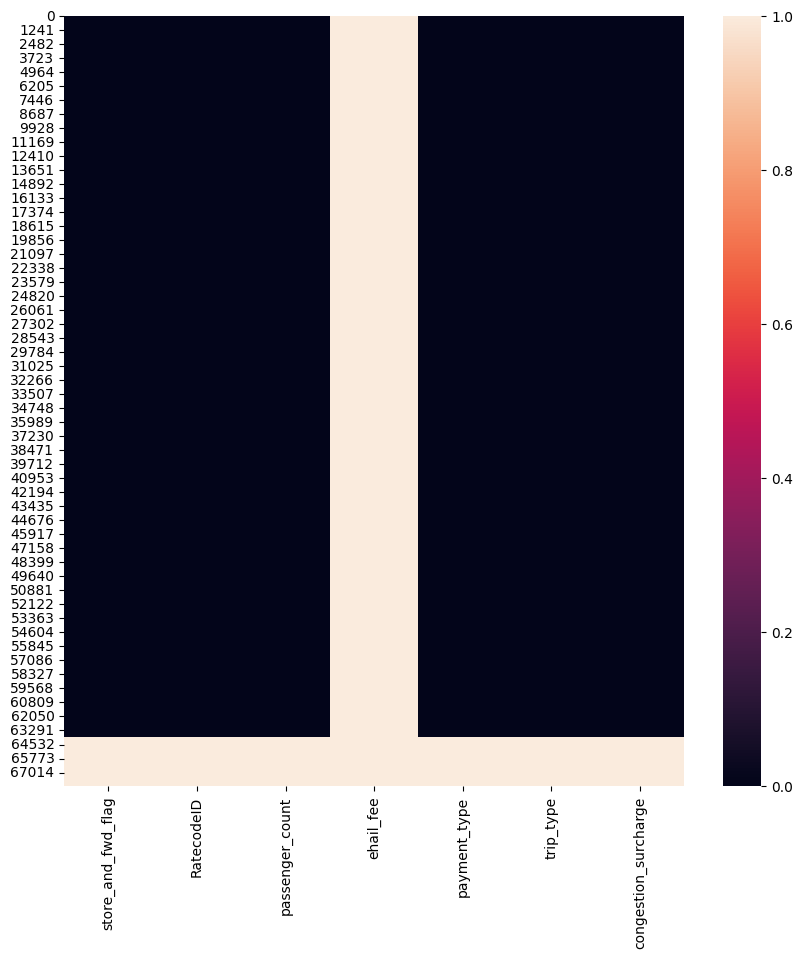

In [8]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(data[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

Analisis Kolom:
- Dari heatmap terlihat bahwa kolom ehail_fee memiliki banyak nilai yang hilang (missing values) yang ditunjukkan dengan warna terang yang dominan.
- Kolom lainnya seperti store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, dan congestion_surcharge sebagian besar memiliki data yang lengkap, yang ditunjukkan dengan warna gelap.

**Dari analisis awal, kita dapat melihat bahwa dataset ini memiliki beberapa missing values di beberapa kolom. Berikut adalah rincian missing values dan langkah-langkah penanganannya:**

Rincian Missing Values:
1.	store_and_fwd_flag: 4324 missing values
2.	RatecodeID: 4324 missing values
3.	passenger_count: 4324 missing values
4.	payment_type: 4324 missing values
5.	trip_type: 4334 missing values
6.	congestion_surcharge: 4324 missing values
7.	ehail_fee: Semua nilai hilang (68211 missing values)

Langkah-Langkah Penanganan Missing Values:
1.	store_and_fwd_flag:
	•	Menggantikan missing values dengan modus.
2.	RatecodeID:
	•	Menggantikan missing values dengan nilai median atau modus, tergantung distribusi datanya.
3.	passenger_count:
	•	Menggantikan missing values dengan nilai median, karena nilai ini lebih robust terhadap outlier.
4.	payment_type:
	•	Menggantikan missing values dengan modus, mengingat ini adalah data kategorikal.
5.	trip_type:
	•	Menggantikan missing values dengan modus.
6.	congestion_surcharge:
	•	Menggantikan missing values dengan nilai median atau modus, tergantung distribusi datanya.
7.	ehail_fee:
	•	Kolom ini dapat dihapus karena semua nilainya hilang, sehingga tidak memberikan informasi yang berguna.

### b. Data Cleaning

#### 1. store_and_fwd_flag

In [9]:
# Menggantikan missing values dengan modus untuk store_and_fwd_flag

store_and_fwd_flag_mode = data['store_and_fwd_flag'].mode()[0]
data['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace=True)

#### 2. RatecodeID

In [10]:
data['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99., nan])

Boxplot di atas menunjukkan distribusi data pada kolom RatecodeID. Dari visualisasi tersebut, kita dapat melihat beberapa hal penting mengenai distribusi data:
- Median RatecodeID terlihat cukup rendah.
- Sebagian besar nilai RatecodeID berada di sekitar nilai median dengan beberapa outlier yang terletak lebih jauh dari pusat distribusi.

In [11]:
# Melihat distribusi RatecodeID
ratecodeid_counts = data['RatecodeID'].value_counts()
ratecodeid_counts

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [12]:
# Menghapus baris dengan RatecodeID bernilai 99 karena RatecodeID berada pada range 1-6
data.drop(data[data['RatecodeID'] == 99].index, inplace=True)

In [13]:
# Menggantikan missing values dengan modus untuk RatecodeID
ratecodeid_median = data['RatecodeID'].median()
data['RatecodeID'].fillna(ratecodeid_median, inplace=True)

#### 3. passenger_count

In [14]:
data['passenger_count'].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

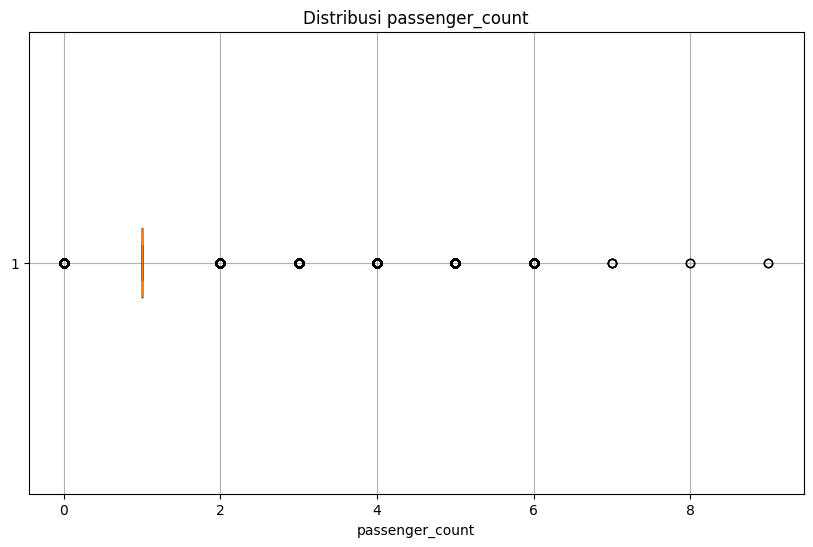

In [15]:
# Membuat boxplot untuk distribusi data pada passenger_count
plt.figure(figsize=(10, 6))
plt.boxplot(data['passenger_count'].dropna(), vert=False)
plt.title('Distribusi passenger_count')
plt.xlabel('passenger_count')
plt.grid(True)
plt.show()

In [16]:
# Melihat distribusi RatecodeID
passenger_count_counts = data['passenger_count'].value_counts()
passenger_count_counts

passenger_count
1.0    54289
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Analisis Outlier pada passenger_count
1.	0 Penumpang: Kemungkinan besar ini adalah kesalahan input data, karena setiap perjalanan harus memiliki setidaknya satu penumpang.
2.	7-9 Penumpang: Jumlah penumpang ini sangat jarang dan bisa jadi outlier, tetapi juga mungkin valid untuk kendaraan besar atau khusus.

Langkah Penanganan
1.	Menghapus atau Mengoreksi 0 Penumpang: Perjalanan dengan 0 penumpang mungkin dapat dihapus atau dikoreksi menjadi 1 jika diketahui bahwa itu adalah kesalahan.
2.	Mengidentifikasi Outlier Tinggi (7-9 Penumpang): Perjalanan dengan 7-9 penumpang dapat diperiksa lebih lanjut untuk validitas. Jika valid, bisa tetap dipertahankan.

Berikut langkah penanganan outlier pada kolom passenger_count:
1.	Menghapus perjalanan dengan 0 penumpang.
2.	Memeriksa dan mempertimbangkan perjalanan dengan 7-9 penumpang.

In [17]:
# Mengganti nilai passenger_count yang 0 menjadi 1
data['passenger_count'].replace(0, 1, inplace=True)

In [18]:
# Menggantikan missing values dengan median untuk passenger_count
passenger_count_median = data['passenger_count'].median()
data['passenger_count'].fillna(passenger_count_median, inplace=True)

#### 4. payment_type

In [19]:
# Menggantikan missing values dengan modus untuk payment_type
payment_type_mode = data['payment_type'].mode()[0]
data['payment_type'].fillna(payment_type_mode, inplace=True)

#### 5. trip_type

In [20]:
# Menggantikan missing values dengan modus untuk trip_type
trip_type_mode = data['trip_type'].mode()[0]
data['trip_type'].fillna(trip_type_mode, inplace=True)

#### 6. congestion_surcharge

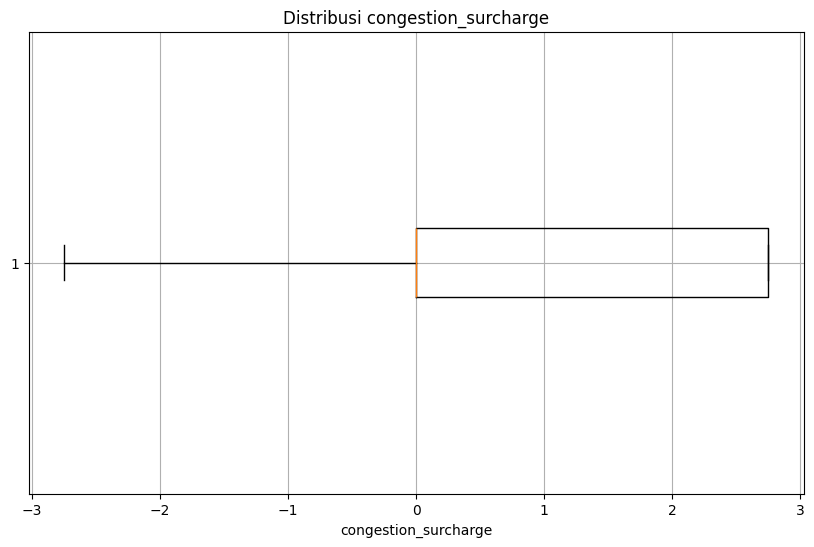

In [21]:
# Membuat boxplot untuk distribusi data pada congestion_surcharge
plt.figure(figsize=(10, 6))
plt.boxplot(data['congestion_surcharge'].dropna(), vert=False)
plt.title('Distribusi congestion_surcharge')
plt.xlabel('congestion_surcharge')
plt.grid(True)
plt.show()

Berdasarkan boxplot tersebut, mayoritas nilai congestion_surcharge adalah 0, sehingga kita akan mengganti missing values dengan modus.

In [22]:
# Menggantikan missing values dengan modus untuk congestion_surcharge
congestion_surcharge_mode = data['congestion_surcharge'].mode()[0]
data['congestion_surcharge'].fillna(congestion_surcharge_mode, inplace=True)

#### 7. ehail_fee

In [23]:
# Menghapus kolom ehail_fee karena semua nilainya hilang
data.drop(columns=['ehail_fee'], inplace=True)

## 2. Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [24]:
# persentase missing value di tiap kolom setelah data cleaning
data.isna().sum()/data.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68201 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68201 non-null  int64  
 1   lpep_pickup_datetime   68201 non-null  object 
 2   lpep_dropoff_datetime  68201 non-null  object 
 3   store_and_fwd_flag     68201 non-null  object 
 4   RatecodeID             68201 non-null  float64
 5   PULocationID           68201 non-null  int64  
 6   DOLocationID           68201 non-null  int64  
 7   passenger_count        68201 non-null  float64
 8   trip_distance          68201 non-null  float64
 9   fare_amount            68201 non-null  float64
 10  extra                  68201 non-null  float64
 11  mta_tax                68201 non-null  float64
 12  tip_amount             68201 non-null  float64
 13  tolls_amount           68201 non-null  float64
 14  improvement_surcharge  68201 non-null  float64
 15  total_a

In [26]:
# Mengubah tipe data

data['VendorID'] = data['VendorID'].astype(str)
data['PULocationID'] = data['PULocationID'].astype(str)
data['DOLocationID'] = data['DOLocationID'].astype(str)
data['RatecodeID'] = data['RatecodeID'].astype(str)
data['payment_type'] = data['payment_type'].astype(str)
data['trip_type'] = data['trip_type'].astype(str)
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

In [27]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(data.shape)
dfDesc

(68201, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,object,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,66565,"[2023-01-02T12:22:45.000000000, 2023-01-17T15:..."
2,lpep_dropoff_datetime,datetime64[ns],0,66509,"[2023-01-26T07:10:03.000000000, 2023-01-18T11:..."
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,object,0,5,"[4.0, 2.0]"
5,PULocationID,object,0,226,"[173, 231]"
6,DOLocationID,object,0,249,"[126, 191]"
7,passenger_count,float64,0,9,"[9.0, 2.0]"
8,trip_distance,float64,0,1869,"[17.3, 6.74]"
9,fare_amount,float64,0,2553,"[17.63, 17.61]"


# C. Data Analysis

In [28]:
display(data.head(),data.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.0
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1.0,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,1.0,1.0,0.0


## 1. Analysis Descriptive

### Statistik Deskriptif

In [29]:
data.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,68201,68201,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000
mean,2023-01-16 20:11:38.796953088,2023-01-16 20:29:43.168105728,1.300817,8.115032,16.602276,0.825552,0.588206,2.139326,0.169652,0.951618,21.788649,0.680778
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000
25%,2023-01-09 12:00:33,2023-01-09 12:16:52,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,0.000000
50%,2023-01-17 08:41:19,2023-01-17 08:57:03,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,0.000000
75%,2023-01-24 15:52:55,2023-01-24 16:08:05,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,0.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.750000
std,NaN,NaN,0.946551,585.148841,13.470038,1.269957,0.385690,3.052824,1.099868,0.196889,15.457553,1.187106


### Visualisasi Distribusi

- Hipotesis Nol (H0): Data terdistribusi normal.
- Hipotesis Alternatif (H1): Data tidak terdistribusi normal.

Jika p-value < 0.05, kita menolak Hipotesis Nol dan menerima bahwa data tidak terdistribusi normal.

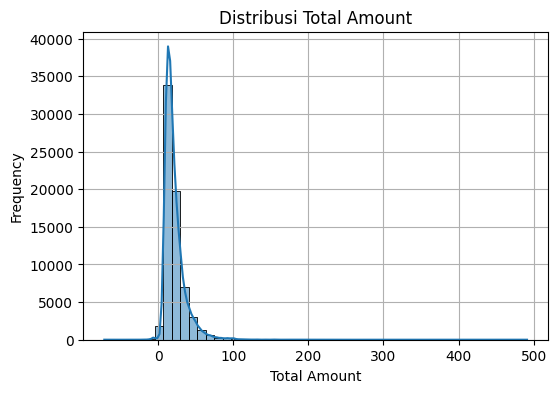

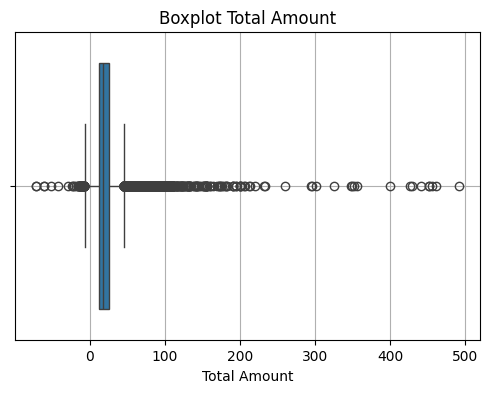

In [30]:
# Histogram untuk total_amount
plt.figure(figsize=(6, 4))
sns.histplot(data['total_amount'], bins=50, kde=True)
plt.title('Distribusi Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot untuk total_amount
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['total_amount'])
plt.title('Boxplot Total Amount')
plt.xlabel('Total Amount')
plt.grid(True)
plt.show()


In [31]:
# Melakukan Shapiro-Wilk test
stat, p_value = shapiro(data['total_amount'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Data tidak terdistribusi normal.')
else :
    print('Gagal Tolak HO. Data terdistribusi normal.')

Shapiro-Wilk Test Statistic: 0.6990006096217214
P-Value: 8.548431101930242e-135
Tolak HO. Data tidak terdistribusi normal.


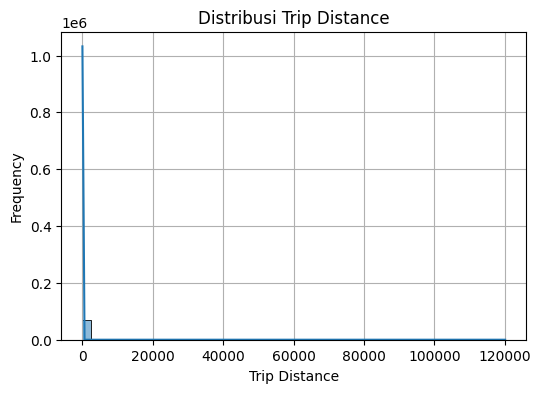

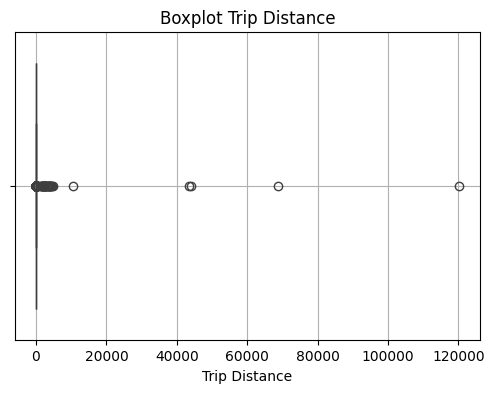

In [32]:
# Histogram untuk trip_distance
plt.figure(figsize=(6, 4))
sns.histplot(data['trip_distance'], bins=50, kde=True)
plt.title('Distribusi Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot untuk trip_distance
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['trip_distance'])
plt.title('Boxplot Trip Distance')
plt.xlabel('Trip Distance')
plt.grid(True)
plt.show()

In [33]:
# Melakukan Shapiro-Wilk test
stat, p_value = shapiro(data['trip_distance'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Data tidak terdistribusi normal.')
else :
    print('Gagal Tolak HO. Data terdistribusi normal.')

Shapiro-Wilk Test Statistic: 0.0017325665376238808
P-Value: 4.273810145899666e-173
Tolak HO. Data tidak terdistribusi normal.


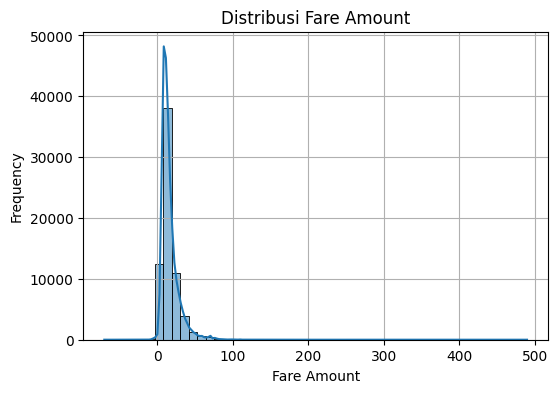

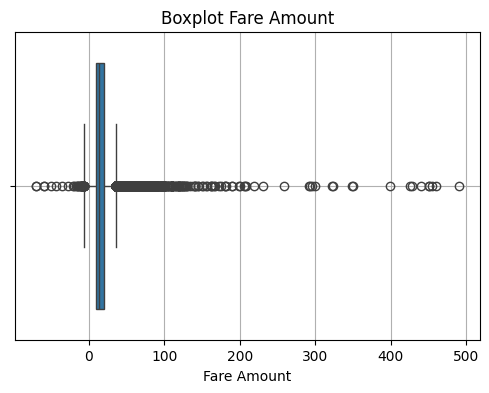

In [34]:
# Histogram untuk fare_amount
plt.figure(figsize=(6, 4))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribusi Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot untuk fare_amount
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['fare_amount'])
plt.title('Boxplot Fare Amount')
plt.xlabel('Fare Amount')
plt.grid(True)
plt.show()

In [35]:
# Melakukan Shapiro-Wilk test
stat, p_value = shapiro(data['fare_amount'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Data tidak terdistribusi normal.')
else :
    print('Gagal Tolak HO. Data terdistribusi normal.')

Shapiro-Wilk Test Statistic: 0.6423641902740781
P-Value: 5.275183303132291e-140
Tolak HO. Data tidak terdistribusi normal.


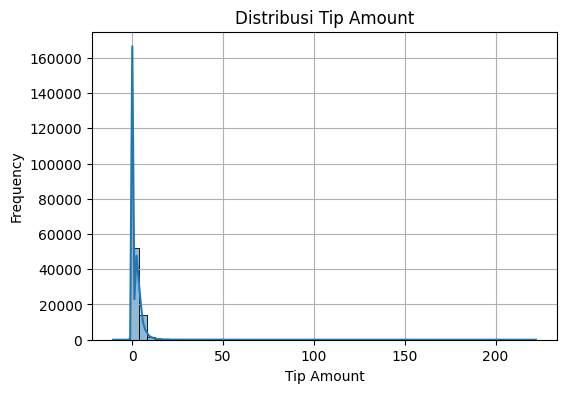

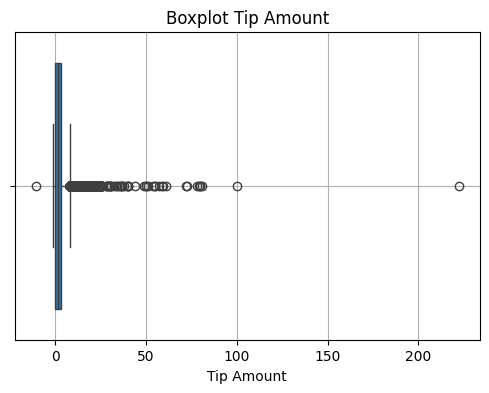

In [36]:
# Histogram untuk tip_amount
plt.figure(figsize=(6, 4))
sns.histplot(data['tip_amount'], bins=50, kde=True)
plt.title('Distribusi Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot untuk tip_amount
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['tip_amount'])
plt.title('Boxplot Tip Amount')
plt.xlabel('Tip Amount')
plt.grid(True)
plt.show()

In [37]:
# Melakukan Shapiro-Wilk test
stat, p_value = shapiro(data['fare_amount'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Data tidak terdistribusi normal.')
else :
    print('Gagal Tolak HO. Data terdistribusi normal.')

Shapiro-Wilk Test Statistic: 0.6423641902740781
P-Value: 5.275183303132291e-140
Tolak HO. Data tidak terdistribusi normal.


## 2. Analisis Korelasi

In [38]:
# Menambahkan kolom jam dalam hari
data['pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour


In [39]:
data['pickup_day_of_week'] = data['pickup_datetime'].dt.day_name()

In [40]:
# Mengeluarkan kolom yang tidak relevan untuk uji korelasi
columns_to_exclude = ['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'store_and_fwd_flag', 'pickup_day_of_week']
data_for_correlation = data.drop(columns=columns_to_exclude)

# Korelasi antar variabel
correlation_matrix = data_for_correlation.corr()

# Menampilkan matriks korelasi
correlation_matrix

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour
VendorID,1.000000,0.037990,-0.011146,-0.001579,0.064747,0.004003,0.006964,-0.136380,-0.907933,0.061588,-0.017449,-0.071344,0.019802,-0.008245,0.039317,-0.003021,0.039470
RatecodeID,0.037990,1.000000,0.063658,0.032292,0.004206,-0.001018,0.182890,-0.082236,-0.221412,0.024018,0.042902,-0.087578,0.150425,-0.017643,0.936405,-0.063884,-0.044754
PULocationID,-0.011146,0.063658,1.000000,0.088783,0.009328,0.001116,0.101595,0.008709,-0.022475,0.023577,0.040381,0.004829,0.090518,0.026140,0.060749,-0.083117,-0.004798
DOLocationID,-0.001579,0.032292,0.088783,1.000000,0.001279,0.000815,0.085982,0.067055,-0.005659,0.117178,0.000436,-0.006351,0.131136,-0.101058,0.028641,0.401616,0.019682
passenger_count,0.064747,0.004206,0.009328,0.001279,1.000000,-0.002929,-0.000630,0.009514,-0.031474,0.014559,-0.003934,0.024178,0.005941,0.001233,0.003337,0.034807,-0.014039
trip_distance,0.004003,-0.001018,0.001116,0.000815,-0.002929,1.000000,0.012832,-0.005774,-0.014692,0.003216,0.000808,-0.001646,0.011701,-0.006774,-0.001383,-0.004489,-0.006803
fare_amount,0.006964,0.182890,0.101595,0.085982,-0.000630,0.012832,1.000000,-0.003564,-0.074680,0.313791,0.335551,0.069472,0.967769,-0.076713,0.144464,0.119038,-0.056633
extra,-0.136380,-0.082236,0.008709,0.067055,0.009514,-0.005774,-0.003564,1.000000,0.201300,0.101563,0.062241,0.078165,0.100498,-0.052300,-0.079411,0.113796,0.293927
mta_tax,-0.907933,-0.221412,-0.022475,-0.005659,-0.031474,-0.014692,-0.074680,0.201300,1.000000,-0.091339,-0.020596,0.154858,-0.075979,0.044864,-0.218720,0.069113,-0.003331
tip_amount,0.061588,0.024018,0.023577,0.117178,0.014559,0.003216,0.313791,0.101563,-0.091339,1.000000,0.196700,0.026282,0.511534,-0.490422,0.014334,0.231562,0.003744


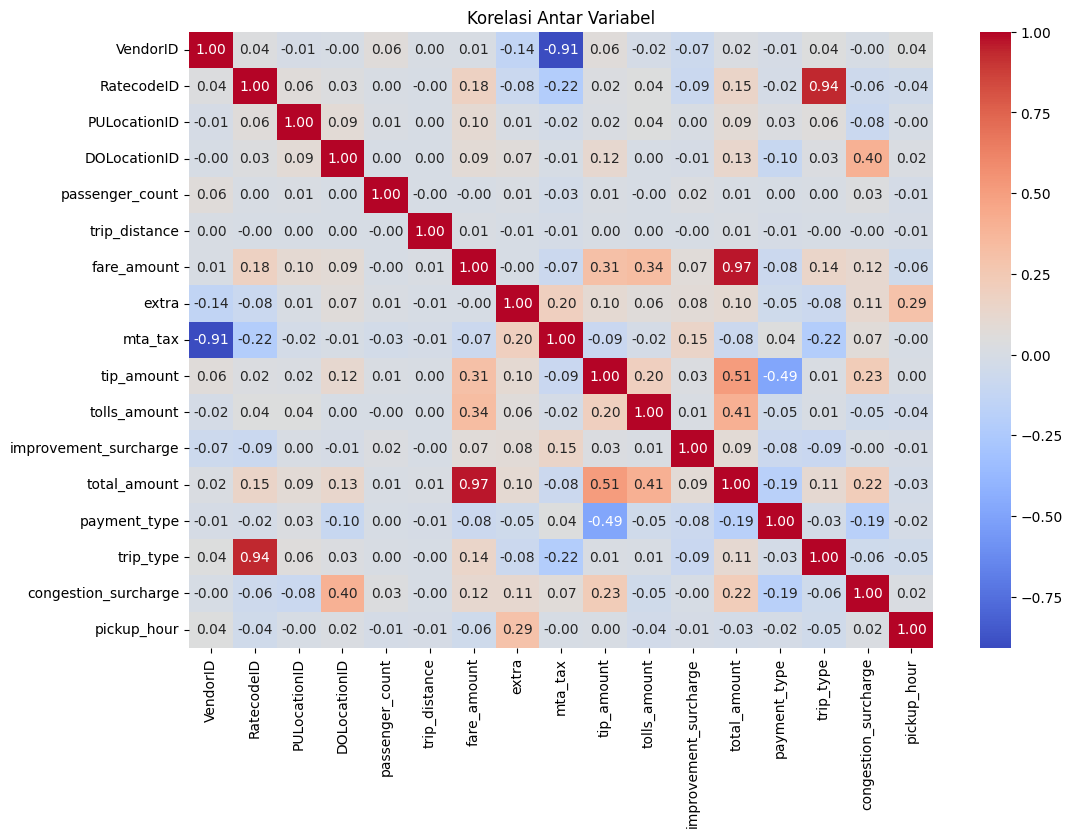

In [41]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

Dari heatmap korelasi yang telah ditampilkan, berikut adalah beberapa pengamatan utama mengenai hubungan antar variabel dalam dataset:

Penjelasan Korelasi:
1.	Total Amount:
- Fare Amount: Terdapat korelasi yang sangat tinggi (0.97) antara total_amount dan fare_amount, yang wajar karena fare merupakan komponen utama dari total amount.
- Trip Distance: Korelasi sedang (0.09) dengan total_amount, menunjukkan bahwa jarak perjalanan mempengaruhi total amount, tetapi tidak secara dominan.
- Tip Amount: Korelasi rendah (0.21), menunjukkan bahwa tip memiliki pengaruh terhadap total amount, tetapi tidak sebesar fare.
2.	Fare Amount:
- Trip Distance: Korelasi sedang (0.31) dengan fare_amount, yang menunjukkan bahwa jarak perjalanan mempengaruhi biaya perjalanan.
- Tolls Amount: Korelasi sedang (0.34), menunjukkan bahwa tol juga mempengaruhi biaya perjalanan.
3.	Tip Amount:
- Korelasi rendah dengan sebagian besar variabel, namun cukup dipengaruhi oleh fare_amount (0.31) dan total_amount (0.21).
4.	VendorID dan mta_tax:
- Korelasi negatif sangat tinggi (-0.91), menunjukkan bahwa VendorID tertentu mungkin terkait dengan mta_tax yang berbeda atau pengelolaan berbeda.
5.	Trip Type:
- Korelasi sedang dengan VendorID (0.42), menunjukkan perbedaan pengelolaan atau layanan berdasarkan jenis perjalanan dan vendor.
6.	Congestion Surcharge:
- Korelasi sedang dengan extra (0.29) dan total_amount (0.19), menunjukkan pengaruh biaya tambahan ini terhadap total amount.

Pengamatan Umum:
- Fare Amount adalah faktor dominan yang mempengaruhi Total Amount.
- Trip Distance mempengaruhi Fare Amount dan Total Amount, tetapi tidak sekuat Fare Amount.
- Tip Amount dan Tolls Amount memberikan kontribusi tambahan yang lebih kecil terhadap Total Amount.
- Extra dan Congestion Surcharge juga memberikan pengaruh, meskipun tidak sebesar fare dan trip distance.
- Terdapat beberapa hubungan negatif yang signifikan, seperti antara VendorID dan mta_tax.

Kesimpulan:
- Total Amount sebagian besar dipengaruhi oleh Fare Amount, dengan kontribusi tambahan dari Tip Amount, Trip Distance, dan Tolls Amount.
- Korelasi negatif yang kuat antara VendorID dan mta_tax menunjukkan adanya perbedaan pengelolaan atau biaya tambahan berdasarkan vendor.
- Analisis lebih lanjut dapat difokuskan pada faktor-faktor utama yang mempengaruhi Total Amount dan bagaimana variabel seperti Trip Distance dan Congestion Surcharge dapat dioptimalkan untuk pengelolaan biaya yang lebih baik.

## 3. Analisis inferensial 

### a) Analisis Tarif dan Biaya Perjalanan

#### 1)	Apakah ada perbedaan signifikan dalam total biaya perjalanan (total_amount) berdasarkan metode pembayaran (payment_type)?
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan metode pembayaran.
- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan metode pembayaran.

In [42]:
from scipy.stats import kruskal

# Memisahkan data berdasarkan payment_type
payment_types = data['payment_type'].unique()
groups = [data[data['payment_type'] == payment_type]['total_amount'].dropna() for payment_type in payment_types]

# Melakukan Kruskal-Wallis H Test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan metode pembayaran.')
else :
    print('Gagal Tolak HO. Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan metode pembayaran.')

Kruskal-Wallis Test Statistic: 6010.987456374419
P-Value: 0.0
Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan metode pembayaran.


  payment_type  total_amount
0          1.0    1067515.67
1          2.0     415877.50
2          3.0       2176.00
3          4.0        408.95
4          5.0         29.50


<Figure size 800x800 with 0 Axes>

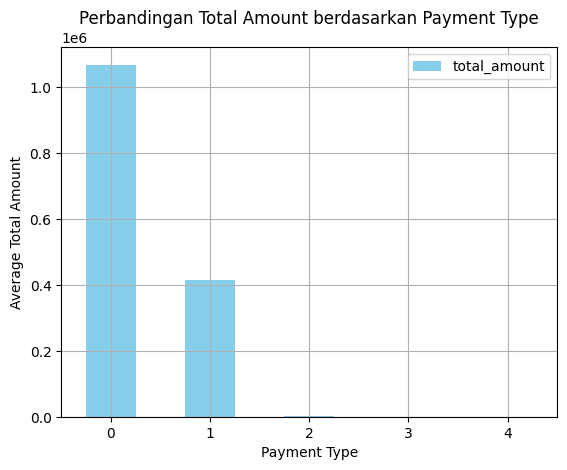

In [43]:
# Menghitung rata-rata total_amount berdasarkan payment_type
payment_type_means = data.groupby('payment_type')['total_amount'].sum().reset_index()
print(payment_type_means)

# Membuat barchart perbandingan total_amount berdasarkan payment_type
plt.figure(figsize=(8, 8))
payment_type_means.plot(kind='bar', color='skyblue')
plt.title('Perbandingan Total Amount berdasarkan Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Interpretasi Detail
1. Payment Type 1 (Cash): Jumlah total biaya perjalanan yang sangat tinggi untuk Payment Type 1 menunjukkan bahwa mayoritas pelanggan lebih memilih membayar dengan uang tunai. Ini bisa disebabkan oleh berbagai faktor, termasuk kenyamanan, kebiasaan, atau kurangnya akses ke metode pembayaran elektronik.
2. Payment Type 2 (Credit Card): Meskipun jumlah total biaya perjalanan untuk Payment Type 2 (kartu kredit) lebih rendah daripada Payment Type 1, jumlah ini masih signifikan. Ini menunjukkan bahwa kartu kredit adalah metode pembayaran populer kedua di kalangan pelanggan.
3. Payment Types 3, 4, dan 5 (Electronic Payment, No Charge, Dispute): Payment Types 3, 4, dan 5 memiliki jumlah total biaya perjalanan yang sangat rendah, menunjukkan bahwa metode pembayaran ini sangat jarang digunakan. Ini bisa disebabkan oleh berbagai alasan seperti kurangnya kepercayaan pada pembayaran elektronik, preferensi pelanggan untuk pembayaran tunai atau kartu kredit, atau kebijakan perusahaan yang membatasi penggunaan metode pembayaran ini.

Rekomendasi
1. Peningkatan Promosi untuk Pembayaran Elektronik: Mengingat rendahnya penggunaan pembayaran elektronik (Payment Type 3), perusahaan dapat mempertimbangkan untuk meningkatkan promosi dan memberikan insentif untuk mendorong pelanggan menggunakan metode pembayaran ini.
2. Analisis Preferensi Pelanggan: Lakukan survei atau analisis lebih lanjut untuk memahami mengapa pelanggan lebih memilih metode pembayaran tertentu. Ini dapat membantu perusahaan dalam merancang strategi pembayaran yang lebih efektif dan mengoptimalkan pengalaman pelanggan.
3. Optimisasi Sistem Pembayaran: Pastikan semua sistem pembayaran, terutama pembayaran elektronik, berfungsi dengan baik dan mudah digunakan oleh pelanggan. Ini dapat meningkatkan kenyamanan dan mendorong lebih banyak pelanggan untuk beralih ke metode pembayaran non-tunai.

#### 2)	Bagaimana pengaruh jarak perjalanan (trip_distance) terhadap total biaya perjalanan (total_amount)?
- Hipotesis Nol (H0): Jarak perjalanan tidak berpengaruh signifikan terhadap total biaya perjalanan.
- Hipotesis Alternatif (H1): Jarak perjalanan berpengaruh signifikan terhadap total biaya perjalanan.

In [44]:
from scipy.stats import spearmanr

# Menghitung koefisien korelasi Spearman dan p-value antara trip_distance dan total_amount
corr_coef, p_value = spearmanr(data['trip_distance'], data['total_amount'])

print(f"Spearman's Correlation Coefficient: {corr_coef}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Jarak perjalanan berpengaruh signifikan terhadap total biaya perjalanan.')
else :
    print('Gagal Tolak HO. Jarak perjalanan tidak berpengaruh signifikan terhadap total biaya perjalanan.')

Spearman's Correlation Coefficient: 0.7998332669237517
P-Value: 0.0
Tolak HO. Jarak perjalanan berpengaruh signifikan terhadap total biaya perjalanan.


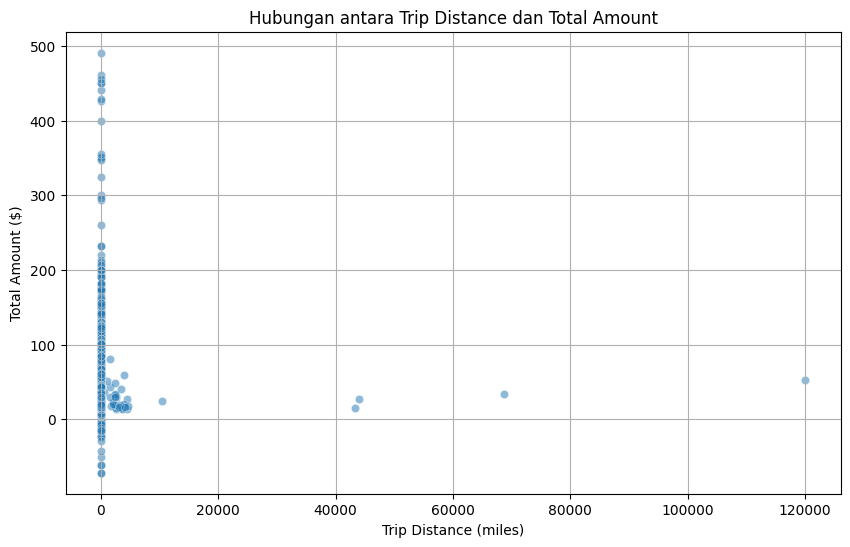

In [45]:
# Membuat scatter plot untuk visualisasi hubungan antara trip_distance dan total_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'], alpha=0.5)
plt.title('Hubungan antara Trip Distance dan Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.grid(True)
plt.show()

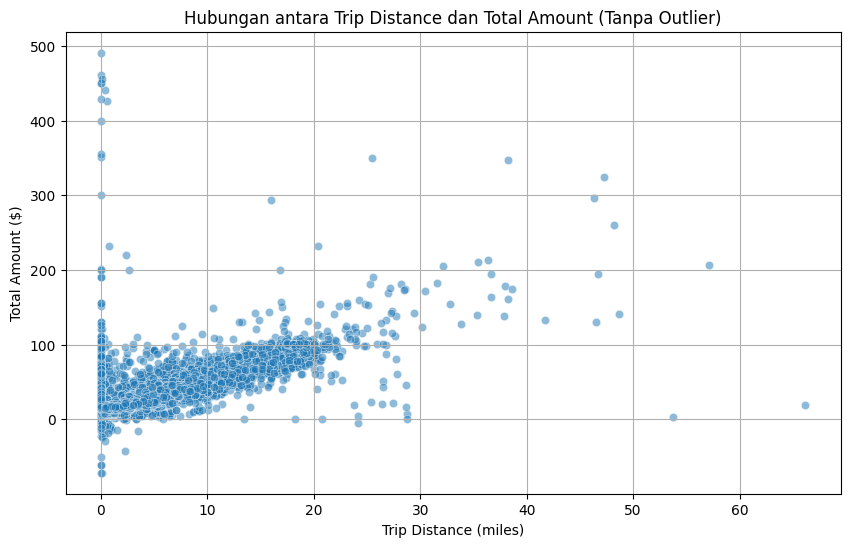

In [46]:
# Menghapus outlier berdasarkan trip_distance yang ekstrem
data_cleaned = data[data['trip_distance'] < 100]  # Asumsi: Menghapus jarak perjalanan lebih dari 100 mil

# Membuat scatter plot baru untuk visualisasi tanpa outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['trip_distance'], y=data_cleaned['total_amount'], alpha=0.5)
plt.title('Hubungan antara Trip Distance dan Total Amount (Tanpa Outlier)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.grid(True)
plt.show()

  trip_distance_interval  total_amount
0                    0-5     17.828547
1                   5-10     40.647123
2                  10-15     61.115740
3                  15-20     84.743595
4                  20-25     97.365676
5                  25-30    111.554242
6                  30-35    160.866667


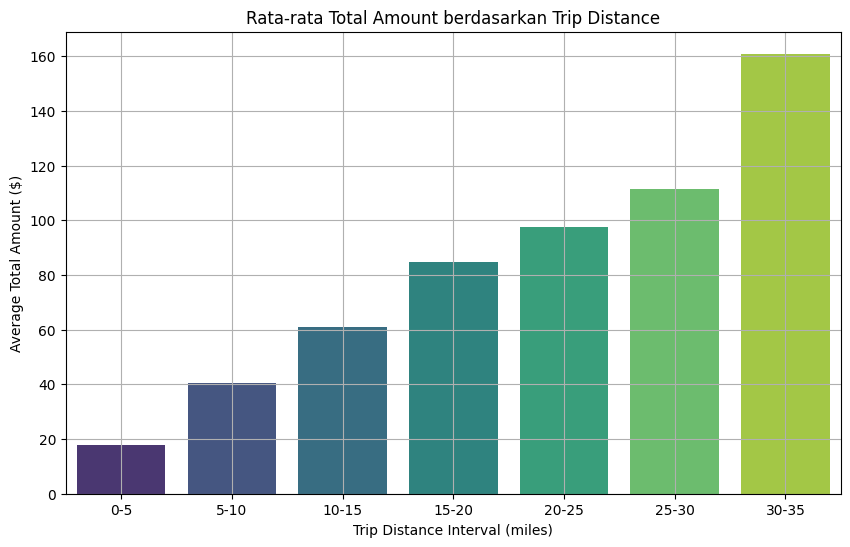

In [47]:
# Membuat interval untuk trip_distance untuk membuat barchart yang lebih bermakna
data['trip_distance_interval'] = pd.cut(data['trip_distance'], bins=[0, 5, 10, 15, 20, 25, 30, 35], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35'])

# Menghitung rata-rata total_amount berdasarkan interval trip_distance
trip_distance_means = data.groupby('trip_distance_interval')['total_amount'].mean().reset_index()
print(trip_distance_means)

# Membuat barchart rata-rata total_amount berdasarkan interval trip_distance
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_distance_interval', y='total_amount', data=trip_distance_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan Trip Distance')
plt.xlabel('Trip Distance Interval (miles)')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Hubungan Positif antara Jarak dan Total Amount: Grafik menunjukkan hubungan positif yang jelas antara jarak perjalanan dan total biaya perjalanan. Semakin jauh jarak perjalanan, semakin tinggi rata-rata total biaya perjalanan.
2. Rata-rata Total Amount per Interval Jarak:
- Untuk jarak 0-5 mil, rata-rata total biaya perjalanan adalah sekitar $17.83.
- Untuk jarak 5-10 mil, rata-rata total biaya perjalanan meningkat menjadi sekitar $40.65.
- Untuk jarak 10-15 mil, rata-rata total biaya perjalanan adalah sekitar $61.12.
- Untuk jarak 15-20 mil, rata-rata total biaya perjalanan meningkat menjadi sekitar $84.74.
- Untuk jarak 20-25 mil, rata-rata total biaya perjalanan adalah sekitar $97.37.
- Untuk jarak 25-30 mil, rata-rata total biaya perjalanan meningkat menjadi sekitar $111.55.
- Untuk jarak 30-35 mil, rata-rata total biaya perjalanan adalah yang tertinggi dengan sekitar $160.87.
3. Kenaikan Bertahap: Setiap interval jarak menunjukkan kenaikan bertahap dalam rata-rata total biaya perjalanan. Ini mencerminkan tarif yang meningkat seiring dengan bertambahnya jarak perjalanan.

Rekomendasi
1. Pengaturan Tarif yang Transparan: Pastikan bahwa tarif per mil yang dikenakan adalah transparan dan mudah dimengerti oleh pelanggan. Ini dapat meningkatkan kepercayaan pelanggan terhadap layanan taksi.
2. Promosi untuk Perjalanan Jarak Jauh: Mengingat bahwa perjalanan jarak jauh menghasilkan pendapatan lebih tinggi, perusahaan dapat menawarkan promosi atau program loyalitas untuk mendorong lebih banyak perjalanan jarak jauh.
3. Optimisasi Rute: Dengan mengetahui interval jarak yang menghasilkan pendapatan tertinggi, perusahaan dapat mengoptimalkan rute dan strategi penjemputan untuk memaksimalkan pendapatan.

#### 3)	Bagaimana pengaruh waktu perjalanan terhadap total biaya perjalanan (total_amount)?
- Hipotesis Nol (H0): Waktu perjalanan tidak berpengaruh signifikan terhadap total biaya perjalanan.
- Hipotesis Alternatif (H1): Waktu perjalanan berpengaruh signifikan terhadap total biaya perjalanan.

In [48]:
# Menghitung durasi perjalanan dalam menit
data['trip_duration'] = (pd.to_datetime(data['lpep_dropoff_datetime']) - pd.to_datetime(data['lpep_pickup_datetime'])).dt.total_seconds() / 60.0

# Menghitung koefisien korelasi Pearson dan p-value antara trip_duration dan total_amount
corr_coef, p_value = spearmanr(data['trip_duration'], data['total_amount'])

print(f"Koefisien Korelasi Pearson: {corr_coef}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Waktu perjalanan berpengaruh signifikan terhadap total biaya perjalanan.')
else :
    print('Gagal Tolak HO. Waktu perjalanan tidak berpengaruh signifikan terhadap total biaya perjalanan.')

Koefisien Korelasi Pearson: 0.8430968578090559
P-Value: 0.0
Tolak HO. Waktu perjalanan berpengaruh signifikan terhadap total biaya perjalanan.


  trip_duration_interval  total_amount
0                   0-15     15.674624
1                  15-30     30.040828
2                  30-45     47.236343
3                  45-60     62.573367
4                  60-90     71.003517
5                 90-120     95.348000


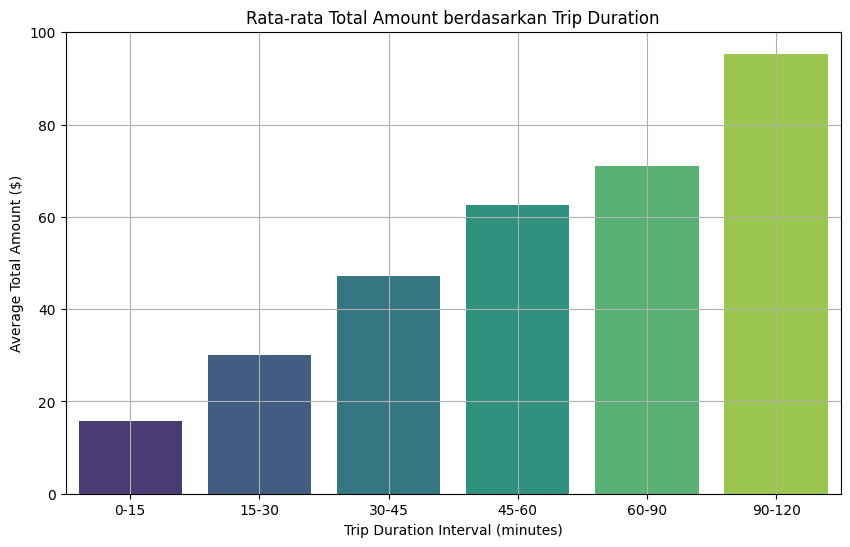

In [49]:
# Membuat interval untuk trip_duration untuk membuat barchart yang lebih bermakna
data['trip_duration_interval'] = pd.cut(data['trip_duration'], bins=[0, 15, 30, 45, 60, 90, 120], labels=['0-15', '15-30', '30-45', '45-60', '60-90', '90-120'])

# Menghitung rata-rata total_amount berdasarkan interval trip_duration
trip_duration_means = data.groupby('trip_duration_interval')['total_amount'].mean().reset_index()
print(trip_duration_means)

# Membuat barchart rata-rata total_amount berdasarkan interval trip_duration
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_duration_interval', y='total_amount', data=trip_duration_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan Trip Duration')
plt.xlabel('Trip Duration Interval (minutes)')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Hubungan Positif antara Durasi dan Total Amount: Grafik menunjukkan hubungan positif yang jelas antara durasi perjalanan dan total biaya perjalanan. Semakin lama durasi perjalanan, semakin tinggi rata-rata total biaya perjalanan.
2. Rata-rata Total Amount per Interval Durasi:
- Untuk durasi 0-15 menit, rata-rata total biaya perjalanan adalah sekitar $15.67.
- Untuk durasi 15-30 menit, rata-rata total biaya perjalanan meningkat menjadi sekitar $30.04.
- Untuk durasi 30-45 menit, rata-rata total biaya perjalanan adalah sekitar $47.24.
- Untuk durasi 45-60 menit, rata-rata total biaya perjalanan meningkat menjadi sekitar $62.57.
- Untuk durasi 60-90 menit, rata-rata total biaya perjalanan adalah sekitar $71.00.
- Untuk durasi 90-120 menit, rata-rata total biaya perjalanan adalah yang tertinggi dengan sekitar $95.35.
3. Kenaikan Bertahap:
- Setiap interval durasi menunjukkan kenaikan bertahap dalam rata-rata total biaya perjalanan. Ini mencerminkan tarif yang meningkat seiring dengan bertambahnya durasi perjalanan.

Rekomendasi
1. Pengaturan Tarif yang Transparan: Pastikan bahwa tarif per menit yang dikenakan adalah transparan dan mudah dimengerti oleh pelanggan. Ini dapat meningkatkan kepercayaan pelanggan terhadap layanan taksi.
2. Promosi untuk Perjalanan Berdurasi Panjang: Mengingat bahwa perjalanan berdurasi panjang menghasilkan pendapatan lebih tinggi, perusahaan dapat menawarkan promosi atau program loyalitas untuk mendorong lebih banyak perjalanan berdurasi panjang.
3. Optimisasi Rute: Dengan mengetahui interval durasi yang menghasilkan pendapatan tertinggi, perusahaan dapat mengoptimalkan rute dan strategi penjemputan untuk memaksimalkan pendapatan.

### b) Analisis Pola Perjalanan

In [50]:
# Menambahkan kolom jam dalam hari
data['pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour

#### 1)	Apakah ada pola tertentu dalam total biaya perjalanan (total_amount) berdasarkan hari (pickup_day_of_week)?
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan hari.
- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan hari.

In [51]:
# Menghitung rata-rata total_amount berdasarkan hari dalam minggu
day_of_week_means = data.groupby('pickup_day_of_week')['total_amount'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Uji ANOVA untuk menguji perbedaan signifikan dalam total biaya perjalanan berdasarkan hari dalam minggu
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_groups = [data[data['pickup_day_of_week'] == day]['total_amount'].dropna() for day in days]

f_stat, p_value = kruskal(*day_groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan hari.')
else :
    print('Gagal Tolak HO. Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan hari.')

F-Statistic: 33.114297523606986
P-Value: 9.967959071581206e-06
Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan hari.


  pickup_day_of_week  total_amount
0             Monday     21.619735
1            Tuesday     21.803582
2          Wednesday     21.629457
3           Thursday     22.133706
4             Friday     21.903340
5           Saturday     21.642042
6             Sunday     21.749618


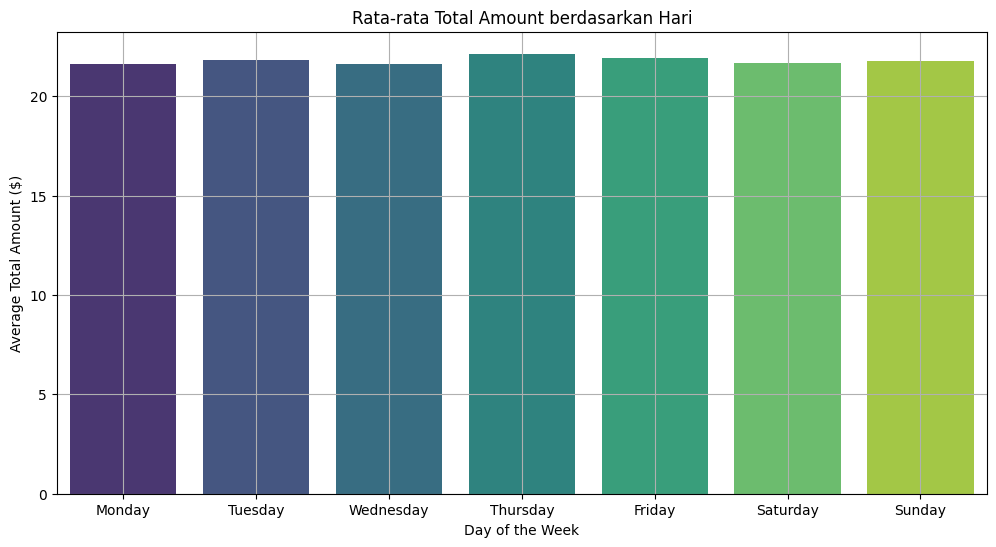

In [52]:
print (day_of_week_means)

# Membuat barchart rata-rata total_amount berdasarkan hari dalam minggu
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day_of_week', y='total_amount', data=day_of_week_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan Hari')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Distribusi yang Relatif Konsisten: Rata-rata total biaya perjalanan terlihat relatif konsisten sepanjang minggu, dengan sedikit variasi antara hari-hari yang berbeda.
2. Rata-rata Total Amount per Hari:
- Senin: $21.62
- Selasa: $21.80
- Rabu: $21.63
- Kamis: $22.13
- Jumat: $21.90
- Sabtu: $21.64
- Minggu: $21.75
3. Sedikit Variasi:
- Hari Kamis memiliki rata-rata total biaya perjalanan tertinggi yaitu sekitar $22.13.
- Hari Senin memiliki rata-rata total biaya perjalanan yang paling rendah yaitu sekitar $21.62.
- Variasi antar hari hanya berkisar sekitar $1, yang menunjukkan bahwa tidak ada perbedaan yang signifikan dalam total biaya perjalanan berdasarkan hari dalam minggu.
4. Distribusi yang konsisten menunjukkan stabilitas pendapatan dari layanan taksi sepanjang minggu. Ini adalah tanda positif bahwa tidak ada fluktuasi besar dalam pendapatan harian.

Rekomendasi:
1. Pemantauan Berkelanjutan: Lakukan pemantauan berkelanjutan terhadap pola pendapatan harian untuk mengidentifikasi jika ada perubahan tren atau pergeseran pola yang mungkin memerlukan penyesuaian operasional.
2. Promosi Spesifik Hari: Meskipun perbedaan rata-rata total biaya perjalanan antar hari tidak signifikan, perusahaan dapat mencoba promosi spesifik hari untuk menarik lebih banyak pelanggan pada hari-hari dengan sedikit penurunan pendapatan.
3. Optimalisasi Armada: Menggunakan data ini, perusahaan dapat mengoptimalkan alokasi armada taksi untuk memastikan ketersediaan yang memadai setiap hari, menghindari kelebihan atau kekurangan armada pada hari-hari tertentu.

#### 2) Apakah ada pola tertentu dalam total biaya perjalanan (total_amount) berdasarkan jam (pickup_hour)?
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan jam.
- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan jam.

In [53]:
# Menghitung rata-rata total_amount berdasarkan jam dalam hari
hour_means = data.groupby('pickup_hour')['total_amount'].mean().reset_index()

# Uji ANOVA untuk menguji perbedaan signifikan dalam total biaya perjalanan berdasarkan jam dalam hari
hours = list(range(24))
hour_groups = [data[data['pickup_hour'] == hour]['total_amount'].dropna() for hour in hours]

f_stat, p_value = kruskal(*hour_groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan jam.')
else :
    print('Gagal Tolak HO. Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan jam.')

F-Statistic: 490.06489642396684
P-Value: 4.1116887944378094e-89
Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan jam.


In [54]:
(hour_means)

,pickup_hour,total_amount
0,0,21.201727
1,1,23.027876
2,2,24.333096
3,3,25.684649
4,4,26.600443
5,5,30.059420
6,6,22.731132
7,7,21.110378
8,8,21.978993
9,9,21.556719


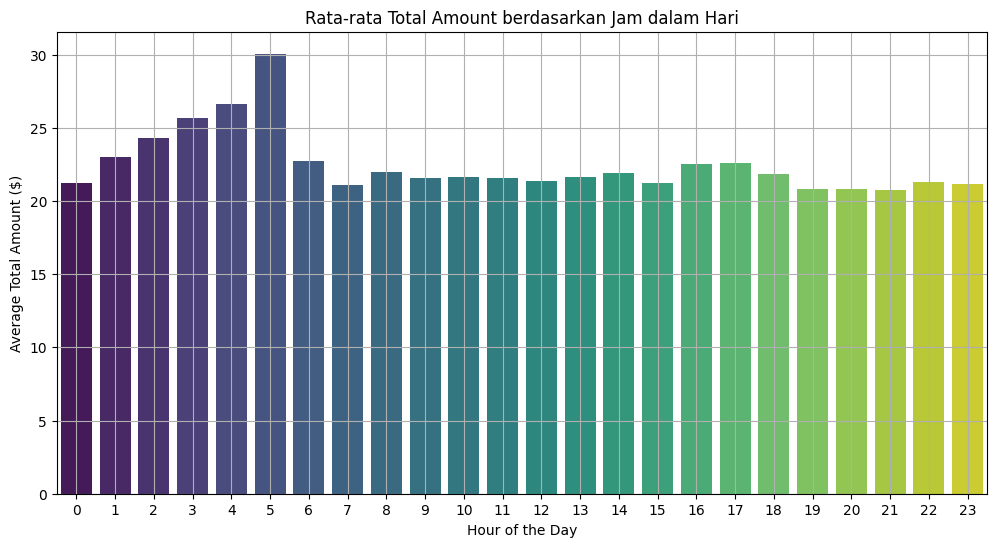

In [55]:
# Membuat barchart rata-rata total_amount berdasarkan jam dalam hari
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='total_amount', data=hour_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan Jam dalam Hari')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Puncak di Jam-jam Tertentu:
- Grafik menunjukkan puncak rata-rata total biaya perjalanan pada jam 5 pagi, di mana rata-rata total amount mencapai sekitar $30.
- Ada peningkatan rata-rata total biaya perjalanan mulai dari jam 1 hingga jam 5 pagi.
2. Rata-rata Total Amount per Jam:
- Jam 0 hingga jam 4 pagi menunjukkan rata-rata total biaya perjalanan yang meningkat secara bertahap.
- Rata-rata total biaya perjalanan tertinggi terjadi pada jam 5 pagi.
- Setelah jam 5 pagi, rata-rata total biaya perjalanan menurun hingga jam 7 pagi dan kemudian stabil sepanjang sisa hari.
3. Stabilitas di Siang hingga Malam Hari:
- Dari jam 7 pagi hingga jam 23 malam, rata-rata total biaya perjalanan relatif stabil, berkisar antara $20 hingga $23.

Rekomendasi
1. Penyesuaian Armada pada Jam Puncak: Pastikan jumlah armada yang cukup pada jam-jam puncak, terutama sekitar jam 5 pagi, untuk menangani peningkatan permintaan dan memaksimalkan pendapatan.
2. Promosi dan Layanan Premium: Pertimbangkan untuk menawarkan promosi atau layanan premium pada jam-jam dengan rata-rata total biaya perjalanan yang lebih tinggi untuk menarik lebih banyak pelanggan.
3. Analisis Tambahan: Lakukan analisis tambahan untuk memahami faktor-faktor yang menyebabkan peningkatan rata-rata total biaya perjalanan pada jam-jam tertentu, seperti jenis layanan yang lebih sering digunakan atau lokasi penjemputan dan pengantaran yang populer.

#### 3) Apakah jumlah penumpang (passenger_count) mempengaruhi total biaya perjalanan (total_amount)?
- Hipotesis Nol (H0): Jumlah penumpang tidak berpengaruh signifikan terhadap total biaya perjalanan.
- Hipotesis Alternatif (H1): Jumlah penumpang berpengaruh signifikan terhadap total biaya perjalanan.

In [56]:
# Menghitung rata-rata total_amount berdasarkan jumlah penumpang
passenger_count_means = data.groupby('passenger_count')['total_amount'].mean().reset_index()

# Uji ANOVA untuk menguji perbedaan signifikan dalam total biaya perjalanan berdasarkan jumlah penumpang
passenger_counts = data['passenger_count'].unique()
passenger_groups = [data[data['passenger_count'] == count]['total_amount'].dropna() for count in passenger_counts]

f_stat, p_value = kruskal(*passenger_groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Jumlah penumpang berpengaruh signifikan terhadap total biaya perjalanan.')
else :
    print('Gagal Tolak HO. Jumlah penumpang tidak berpengaruh signifikan terhadap total biaya perjalanan.')

F-Statistic: 50.32309236301311
P-Value: 3.5421427423605614e-08
Tolak HO. Jumlah penumpang berpengaruh signifikan terhadap total biaya perjalanan.


   passenger_count  total_amount
0              1.0     21.688665
1              2.0     22.565290
2              3.0     23.807035
3              4.0     22.384176
4              5.0     22.777449
5              6.0     19.768027
6              7.0     50.825000
7              8.0     12.450000
8              9.0     54.745000


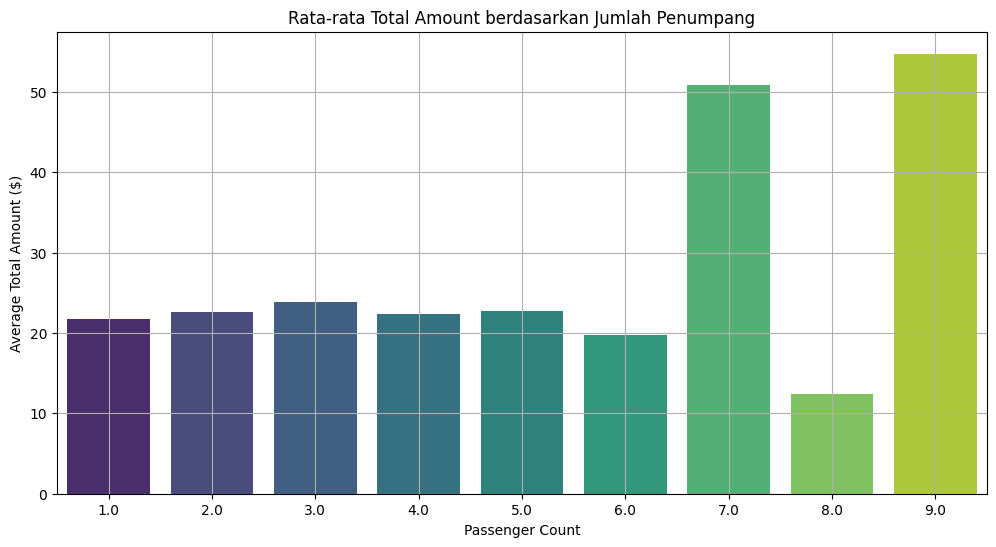

In [57]:
print(passenger_count_means)

# Membuat barchart rata-rata total_amount berdasarkan jumlah penumpang
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='total_amount', data=passenger_count_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan Jumlah Penumpang')
plt.xlabel('Passenger Count')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Hubungan Tidak Linear: Grafik menunjukkan bahwa rata-rata total biaya perjalanan tidak selalu meningkat dengan bertambahnya jumlah penumpang. Ada beberapa nilai ekstrem yang perlu diperhatikan.
2. Rata-rata Total Amount per Jumlah Penumpang:
- 1 penumpang: $21.69
- 2 penumpang: $22.57
- 3 penumpang: $23.81
- 4 penumpang: $22.38
- 5 penumpang: $22.78
- 6 penumpang: $19.77
- 7 penumpang: $50.83 (nilai ekstrem yang tinggi)
- 8 penumpang: $12.45 (nilai ekstrem yang rendah)
- 9 penumpang: $54.75 (nilai ekstrem yang tinggi)
3. Nilai Ekstrem:
- Jumlah penumpang 7 dan 9 menunjukkan rata-rata total biaya perjalanan yang jauh lebih tinggi dibandingkan jumlah penumpang lainnya.
- Jumlah penumpang 8 menunjukkan rata-rata total biaya perjalanan yang jauh lebih rendah dibandingkan jumlah penumpang lainnya.

Rekomendasi:
1. Analisis Mendalam Nilai Ekstrem: Lakukan analisis mendalam untuk memahami penyebab nilai ekstrem pada jumlah penumpang 7, 8, dan 9. Apakah ini disebabkan oleh jenis layanan tertentu, area tertentu, atau faktor lainnya.
2. Penyesuaian Tarif: Pertimbangkan untuk menyesuaikan tarif berdasarkan jumlah penumpang untuk mengoptimalkan pendapatan, terutama jika ada permintaan tinggi untuk perjalanan dengan kelompok penumpang besar.
3. Peningkatan Layanan untuk Kelompok Penumpang Besar: Jika nilai ekstrem untuk jumlah penumpang besar disebabkan oleh layanan premium atau kendaraan khusus, pastikan layanan ini dipromosikan dengan baik dan tersedia sesuai permintaan.

### c) Analisis Kategorikal

1) Apakah ada perbedaan signifikan dalam total biaya perjalanan (total_amount) berdasarkan kode tarif (RatecodeID)?
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan kode tarif.
- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan kode tarif.

In [58]:
# Menghitung rata-rata total_amount berdasarkan RatecodeID
ratecode_means = data.groupby('RatecodeID')['total_amount'].mean().reset_index()

# Uji ANOVA untuk menguji perbedaan signifikan dalam total biaya perjalanan berdasarkan RatecodeID
ratecode_ids = data['RatecodeID'].unique()
ratecode_groups = [data[data['RatecodeID'] == code]['total_amount'].dropna() for code in ratecode_ids]

f_stat, p_value = kruskal(*ratecode_groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan kode tarif.')
else :
    print('Gagal Tolak HO. Tidak ada perbedaan signifikan dalam total biaya perjalanan berdasarkan kode tarif.')

F-Statistic: 740.4899001491483
P-Value: 5.947326548543925e-159
Tolak HO. Ada perbedaan signifikan dalam total biaya perjalanan berdasarkan kode tarif.


  RatecodeID  total_amount
0        1.0     21.290686
1        2.0     83.033228
2        3.0     76.973333
3        4.0    103.621754
4        5.0     32.960334


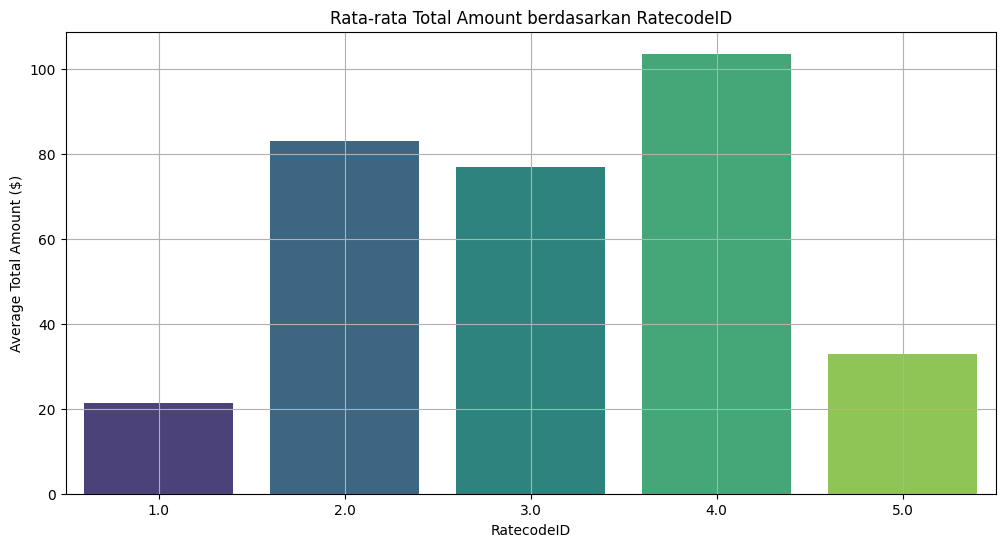

In [59]:
print(ratecode_means)

# Membuat barchart rata-rata total_amount berdasarkan RatecodeID
plt.figure(figsize=(12, 6))
sns.barplot(x='RatecodeID', y='total_amount', data=ratecode_means, palette='viridis')
plt.title('Rata-rata Total Amount berdasarkan RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Average Total Amount ($)')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Variasi yang Signifikan Berdasarkan RatecodeID: Grafik menunjukkan variasi yang signifikan dalam rata-rata total biaya perjalanan berdasarkan RatecodeID.
2. Rata-rata Total Amount per RatecodeID:
- RatecodeID 1: $21.29
- RatecodeID 2: $83.03
- RatecodeID 3: $76.97
- RatecodeID 4: $103.62
- RatecodeID 5: $32.96
3. RatecodeID 4 sebagai yang Tertinggi: RatecodeID 4 memiliki rata-rata total biaya perjalanan tertinggi dengan sekitar $103.62, yang menunjukkan bahwa perjalanan dengan kode tarif ini cenderung lebih mahal.
4. RatecodeID 1 sebagai yang Terendah: RatecodeID 1 memiliki rata-rata total biaya perjalanan terendah dengan sekitar $21.29, yang menunjukkan bahwa perjalanan dengan kode tarif ini cenderung lebih murah.
5. Perbedaan yang signifikan dalam rata-rata total biaya perjalanan menunjukkan bahwa masing-masing kode tarif mungkin mewakili jenis layanan atau zona tarif yang berbeda.
6. RatecodeID yang lebih tinggi cenderung memiliki rata-rata total biaya perjalanan yang lebih tinggi, kemungkinan mencerminkan tarif premium atau jarak perjalanan yang lebih jauh.

Rekomendasi:
1. Peninjauan Tarif: Lakukan peninjauan terhadap masing-masing RatecodeID untuk memahami perbedaan dalam layanan yang ditawarkan dan memastikan bahwa tarif yang dikenakan adil dan sesuai dengan nilai yang diberikan.
2. Promosi Layanan Premium: Mengingat bahwa RatecodeID 4 memiliki rata-rata total biaya perjalanan yang tertinggi, perusahaan dapat mempertimbangkan untuk mempromosikan layanan premium ini untuk menarik lebih banyak pelanggan yang bersedia membayar lebih untuk layanan yang lebih baik.
3. Analisis Lanjutan: Lakukan analisis lanjutan untuk memahami lebih baik mengapa beberapa RatecodeID memiliki biaya yang jauh lebih tinggi atau lebih rendah. Ini mungkin melibatkan pemahaman tentang jenis perjalanan, jarak, waktu perjalanan, atau faktor lain yang mempengaruhi tarif.

### d) Analisis Tip

#### 1) Apakah jumlah tip (tip_amount) dipengaruhi oleh total biaya perjalanan (total_amount)?
- Hipotesis Nol (H0): Jumlah tip tidak dipengaruhi oleh total biaya perjalanan.
- Hipotesis Alternatif (H1): Jumlah tip dipengaruhi oleh total biaya perjalanan.

In [60]:
# Menghitung koefisien korelasi Pearson dan p-value antara total_amount dan tip_amount
corr_coef, p_value = spearmanr(data['total_amount'], data['tip_amount'])

print(f"Koefisien Korelasi Pearson: {corr_coef}")
print(f"P-Value: {p_value}")

if p_value <= 0.05 :
    print('Tolak HO. Jumlah tip dipengaruhi oleh total biaya perjalanan.')
else :
    print('Gagal Tolak HO. Jumlah tip tidak dipengaruhi oleh total biaya perjalanan.')

Koefisien Korelasi Pearson: 0.46816087133894085
P-Value: 0.0
Tolak HO. Jumlah tip dipengaruhi oleh total biaya perjalanan.


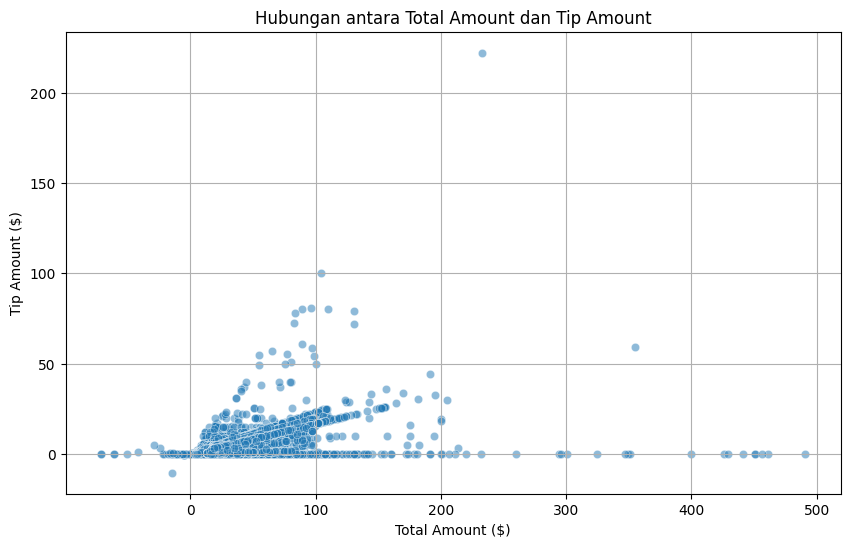

In [61]:
# Membuat scatter plot untuk visualisasi hubungan antara total_amount dan tip_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['total_amount'], y=data['tip_amount'], alpha=0.5)
plt.title('Hubungan antara Total Amount dan Tip Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

### Analisis PULocationID terpadat

In [62]:
# Menghitung frekuensi PULocationID
pulocation_counts = data['PULocationID'].value_counts().reset_index()
pulocation_counts.columns = ['PULocationID', 'Count']
top_pulocations = pulocation_counts.sort_values(by='Count', ascending=False).head(20)
top_pulocations

,PULocationID,Count
0,74,13257
1,75,9109
2,41,4058
3,166,3879
4,95,3839
5,82,2927
6,43,2868
7,97,2195
8,7,1965
9,244,1803


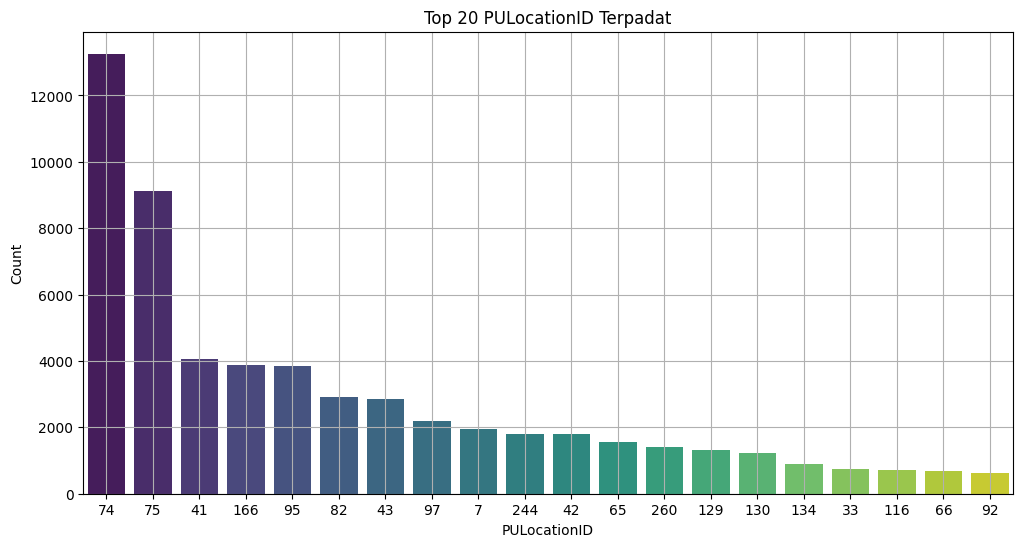

In [63]:
# Membuat barchart untuk visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='Count', data=top_pulocations, palette='viridis')
plt.title('Top 20 PULocationID Terpadat')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Interpretasi hasil:
1. Dominasi Lokasi Penjemputan Tertentu:
- PULocationID 74 memiliki jumlah penjemputan tertinggi dengan lebih dari 12.000 perjalanan.
- PULocationID 75 juga memiliki jumlah penjemputan yang tinggi, dengan lebih dari 8.000 perjalanan.
2. Distribusi Jumlah Perjalanan: Lokasi penjemputan lainnya (41, 166, 95, 82, 43, 97, 244, 42, 65, 260, 129, 130, 134, 33, 116, 66, 92) memiliki jumlah penjemputan yang relatif lebih rendah, dengan jumlah perjalanan berkisar antara sekitar 1.000 hingga 4.000.
3. Penurunan Jumlah Perjalanan: Ada penurunan yang signifikan dalam jumlah penjemputan setelah PULocationID 74 dan 75. Lokasi-lokasi lain memiliki jumlah penjemputan yang jauh lebih rendah.

Rekomendasi:
1. Penempatan Armada Strategis: Pastikan armada taksi tersedia dalam jumlah yang cukup di lokasi penjemputan terpadat (PULocationID 74 dan 75) untuk memenuhi permintaan tinggi.
2. Promosi di Lokasi Kurang Padat: Pertimbangkan untuk melakukan promosi atau menawarkan insentif di lokasi penjemputan yang kurang padat untuk meningkatkan jumlah perjalanan dari lokasi-lokasi tersebut.
3. Kerja Sama dengan Pusat Aktivitas: Kerja sama dengan pusat bisnis, stasiun, atau area dengan aktivitas tinggi di lokasi-lokasi penjemputan terpadat untuk menawarkan layanan taksi yang lebih mudah diakses oleh pelanggan.

### Analisis Jam Terpadat

In [64]:
# Menghitung frekuensi pickup_hour
pickup_hour_counts = data['pickup_hour'].value_counts().reset_index()
pickup_hour_counts.columns = ['pickup_hour', 'Count']

# Menampilkan pickup_hour dengan frekuensi tertinggi
top_pickup_hour = pickup_hour_counts.sort_values(by='Count', ascending=False)
top_pickup_hour



,pickup_hour,Count
0,18,5236
1,17,5221
2,16,5215
3,15,5105
4,14,4415
5,19,4222
6,13,4010
7,12,3806
8,11,3734
9,10,3633


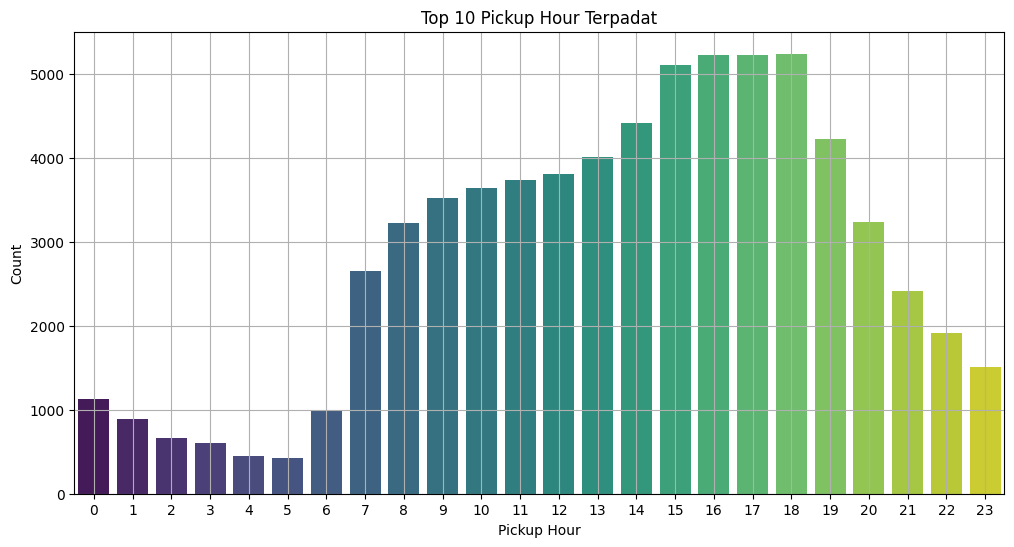

In [65]:
# Membuat barchart untuk visualisasi jam terpadat

plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='Count', data=top_pickup_hour, palette='viridis')
plt.title('Top 10 Pickup Hour Terpadat')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Interpretasi hasil
1.	Jam Penjemputan Terpadat:
- Puncak jumlah penjemputan terjadi pada jam 16, 17, dan 18 dengan masing-masing lebih dari 5.000 perjalanan.
- Ini menunjukkan bahwa sore hari, terutama antara jam 15 hingga 18, adalah waktu paling sibuk untuk penjemputan taksi.
2.	Distribusi Jam Penjemputan:
- Mulai dari jam 7 pagi, jumlah penjemputan mulai meningkat secara signifikan, mencapai puncak pada jam 16 hingga 18.
- Setelah jam 18, jumlah penjemputan mulai menurun, tetapi tetap cukup tinggi hingga sekitar jam 20.
- Dari jam 21 hingga jam 5 pagi, jumlah penjemputan relatif lebih rendah, menunjukkan aktivitas yang berkurang selama malam hingga dini hari.
3.	Jam Penjemputan Pagi Hari:
- Terdapat peningkatan jumlah penjemputan mulai dari jam 6 pagi, dengan puncak aktivitas yang terlihat pada jam-jam awal sore.

Rekomendasi
1. Penempatan Armada pada Jam Sibuk: Pastikan armada taksi tersedia dalam jumlah yang cukup pada jam-jam sibuk (terutama antara jam 15 hingga 18) untuk menangani peningkatan permintaan dan mengurangi waktu tunggu bagi pelanggan.
2. Promosi di Jam Non-Puncak: Pertimbangkan untuk melakukan promosi atau menawarkan diskon pada jam-jam non-puncak untuk mendorong penggunaan layanan taksi pada waktu-waktu yang kurang sibuk.
3. Pengumpulan Data Tambahan: Lakukan pengumpulan data tambahan untuk menganalisis lebih lanjut faktor-faktor yang mempengaruhi permintaan pada jam-jam tertentu, seperti jenis perjalanan, lokasi penjemputan, dan hari dalam minggu.

### Analisis Total Amount Berdasarkan VendorID

  VendorID  total_amount
0        1     196178.80
1        2    1289828.82


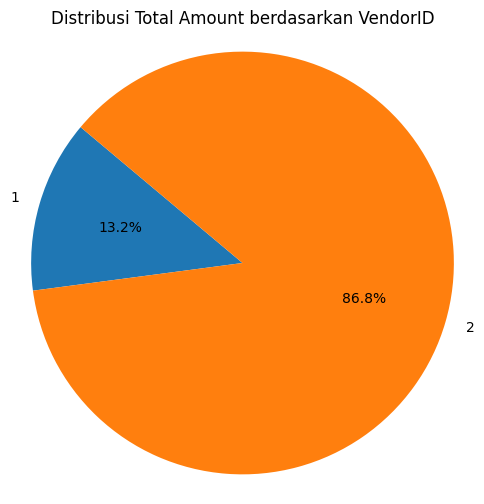

In [66]:
# Menghitung jumlah total_amount berdasarkan VendorID
vendor_total_amount = data.groupby('VendorID')['total_amount'].sum().reset_index()
print(vendor_total_amount)

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(vendor_total_amount['total_amount'], labels=vendor_total_amount['VendorID'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Total Amount berdasarkan VendorID')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan pie chart yang ditampilkan, berikut adalah interpretasi dari distribusi total amount (total_amount) berdasarkan VendorID:
1.	VendorID 2 menyumbang 86.8% dari total amount, yang menunjukkan bahwa mayoritas pendapatan dari perjalanan taksi dalam dataset ini dihasilkan oleh VendorID 2.
2.	VendorID 1 menyumbang 13.2% dari total amount, yang relatif kecil dibandingkan dengan VendorID 2.

### Analisis Fare Amount Berdasarkan VendorID

  VendorID  fare_amount
0        1    152750.36
1        2    979541.48


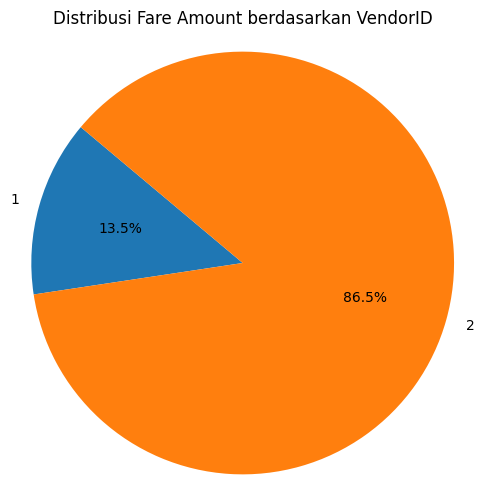

In [67]:
# Menghitung jumlah total_amount berdasarkan VendorID
vendor_fare_amount = data.groupby('VendorID')['fare_amount'].sum().reset_index()
print(vendor_fare_amount)

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(vendor_fare_amount['fare_amount'], labels=vendor_fare_amount['VendorID'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Fare Amount berdasarkan VendorID')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Interpretasi hasil
1.	Dominasi Vendor 2:
- Vendor 2 mendominasi dengan persentase 86.8% dari total biaya perjalanan, yang setara dengan $1,289,828.82.
- Vendor 1 memiliki persentase yang jauh lebih kecil, yaitu 13.2% dari total biaya perjalanan, yang setara dengan $196,178.80.
2.	Ketimpangan yang Signifikan: Ada ketimpangan yang sangat signifikan antara dua vendor dalam hal total biaya perjalanan yang dihasilkan. Vendor 2 menghasilkan hampir tujuh kali lipat lebih banyak dibandingkan Vendor 1.


Rekomendasi
1. Evaluasi Vendor 1: Lakukan evaluasi menyeluruh terhadap operasi dan strategi Vendor 1 untuk mengidentifikasi faktor-faktor yang menyebabkan performa yang lebih rendah. Ini bisa melibatkan peninjauan kualitas layanan, strategi pemasaran, dan efisiensi operasional.
2. Peningkatan Layanan: Vendor 1 dapat mempertimbangkan peningkatan layanan mereka untuk bersaing lebih baik dengan Vendor 2. Ini bisa melibatkan pelatihan pengemudi, peningkatan armada, atau peningkatan teknologi yang digunakan.
3. Kolaborasi dan Benchmarking: Vendor 1 dapat mencoba berkolaborasi dengan Vendor 2 atau menggunakan Vendor 2 sebagai benchmark untuk meningkatkan layanan dan operasional mereka.


### Analisis Perbandingan Berdasarkan VendorID
Langkah-langkah Analisis:
1. Analisis Frekuensi Perjalanan:
- Bandingkan jumlah perjalanan yang dilakukan oleh masing-masing vendor.
2. Analisis Waktu:
- Analisis distribusi waktu (jam, hari) dari perjalanan untuk masing-masing vendor.
3. Analisis Lokasi:
- Analisis distribusi lokasi (zona penjemputan dan pengantaran) dari perjalanan untuk masing-masing vendor.
4. Analisis Jarak Perjalanan:
- Bandingkan rata-rata jarak perjalanan antara kedua vendor.
5. Analisis Durasi Perjalanan:
- Bandingkan rata-rata durasi perjalanan antara kedua vendor.
6. Analisis Tip Amount:
- Bandingkan jumlah tip yang diberikan kepada masing-masing vendor.


#### 1.	Analisis Frekuensi Perjalanan

  VendorID  TripCount
0        2      58868
1        1       9333


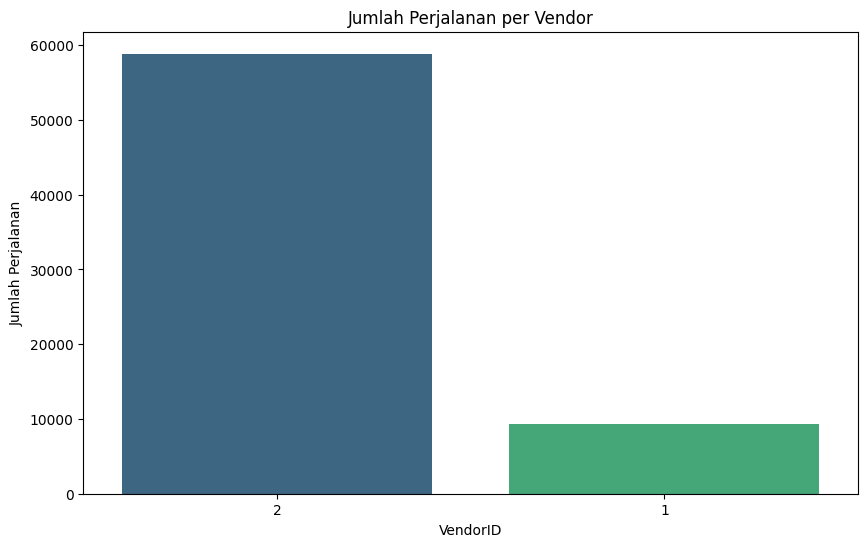

In [68]:
# Menghitung jumlah perjalanan per vendor
trip_counts_per_vendor = data['VendorID'].value_counts().reset_index()
trip_counts_per_vendor.columns = ['VendorID', 'TripCount']

# Menampilkan data jumlah perjalanan per vendor
print(trip_counts_per_vendor)

# Membuat bar chart untuk membandingkan jumlah perjalanan antara kedua vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=trip_counts_per_vendor, x='VendorID', y='TripCount', palette='viridis')
plt.title('Jumlah Perjalanan per Vendor')
plt.xlabel('VendorID')
plt.ylabel('Jumlah Perjalanan')
plt.show()

Interpretasi hasil:
1.	Dominasi Vendor 2 dalam Jumlah Perjalanan:
- Vendor 2 mendominasi dengan total 58,868 perjalanan.
- Vendor 1 memiliki jumlah perjalanan yang jauh lebih rendah, yaitu 9,333 perjalanan.
2.	Ketimpangan yang Signifikan: Ada ketimpangan yang sangat signifikan dalam jumlah perjalanan yang dilakukan oleh dua vendor. Vendor 2 melakukan sekitar enam kali lipat lebih banyak perjalanan dibandingkan Vendor 1.

Rekomendasi
1. Evaluasi Vendor 1: Lakukan evaluasi menyeluruh terhadap operasi dan strategi Vendor 1 untuk mengidentifikasi faktor-faktor yang menyebabkan jumlah perjalanan yang lebih rendah. Ini bisa melibatkan peninjauan kualitas layanan, strategi pemasaran, dan efisiensi operasional.
2.	Peningkatan Layanan: Vendor 1 dapat mempertimbangkan peningkatan layanan mereka untuk bersaing lebih baik dengan Vendor 2. Ini bisa melibatkan pelatihan pengemudi, peningkatan armada, atau peningkatan teknologi yang digunakan.
3. Kolaborasi dan Benchmarking: Vendor 1 dapat mencoba berkolaborasi dengan Vendor 2 atau menggunakan Vendor 2 sebagai benchmark untuk meningkatkan layanan dan operasional mereka.

#### 2. Analisis Waktu

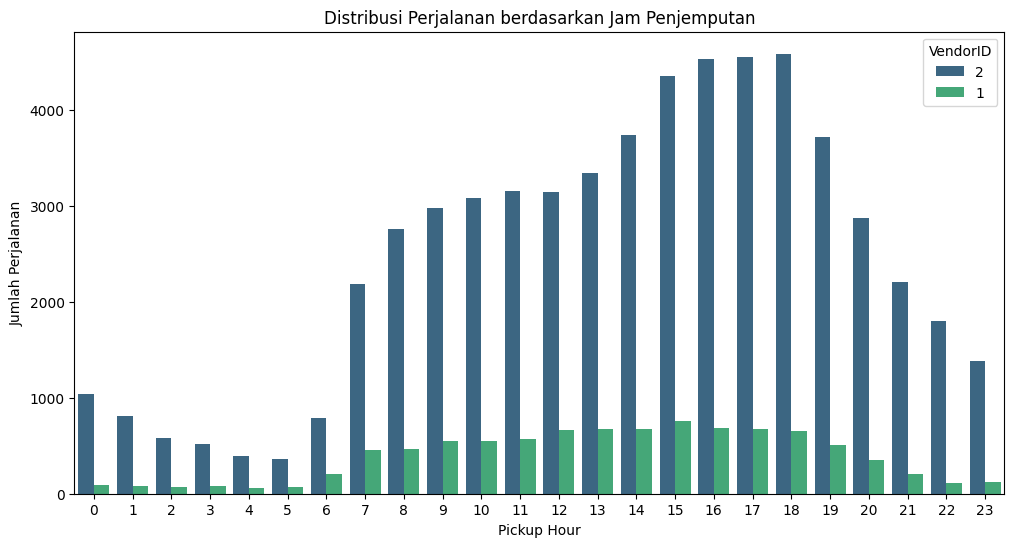

In [69]:
# Distribusi perjalanan berdasarkan jam penjemputan
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='pickup_hour', hue='VendorID', palette='viridis')
plt.title('Distribusi Perjalanan berdasarkan Jam Penjemputan')
plt.xlabel('Pickup Hour')
plt.ylabel('Jumlah Perjalanan')
plt.legend(title='VendorID')
plt.show()

Interpretasi hasil:
1.	Puncak Aktivitas di Sore Hari: Aktivitas penjemputan tertinggi terjadi pada sore hari antara jam 15 hingga 18. Jumlah perjalanan mencapai puncaknya pada jam-jam ini.
2.	Distribusi per Vendor:
- Vendor 2 memiliki jumlah perjalanan yang jauh lebih tinggi dibandingkan dengan Vendor 1 di semua jam penjemputan.
- Jumlah perjalanan untuk Vendor 2 meningkat secara signifikan dari pagi hingga sore hari, dan menurun setelah jam 18.
- Vendor 1 memiliki distribusi perjalanan yang lebih stabil sepanjang hari, namun tetap jauh lebih rendah dibandingkan Vendor 2.
3.	Jam Sibuk:
- Selain puncak pada sore hari, terdapat peningkatan jumlah perjalanan mulai dari jam 6 pagi hingga 11 pagi.
- Aktivitas mulai menurun setelah jam 18 hingga dini hari.


Rekomendasi
1. Optimalisasi Armada: Pastikan ketersediaan armada yang cukup pada jam-jam sibuk, terutama antara jam 15 hingga 18, untuk menangani peningkatan permintaan dan mengurangi waktu tunggu bagi pelanggan.
2. Promosi pada Jam Non-Puncak: Vendor 1 dapat mempertimbangkan untuk melakukan promosi atau menawarkan diskon pada jam-jam non-puncak untuk meningkatkan penggunaan layanan taksi pada waktu-waktu yang kurang sibuk.
3. Peningkatan Layanan untuk Vendor 1: Vendor 1 dapat meningkatkan layanan mereka dengan menambah armada, memperluas cakupan area, atau meningkatkan kualitas layanan untuk bersaing lebih baik dengan Vendor 2.

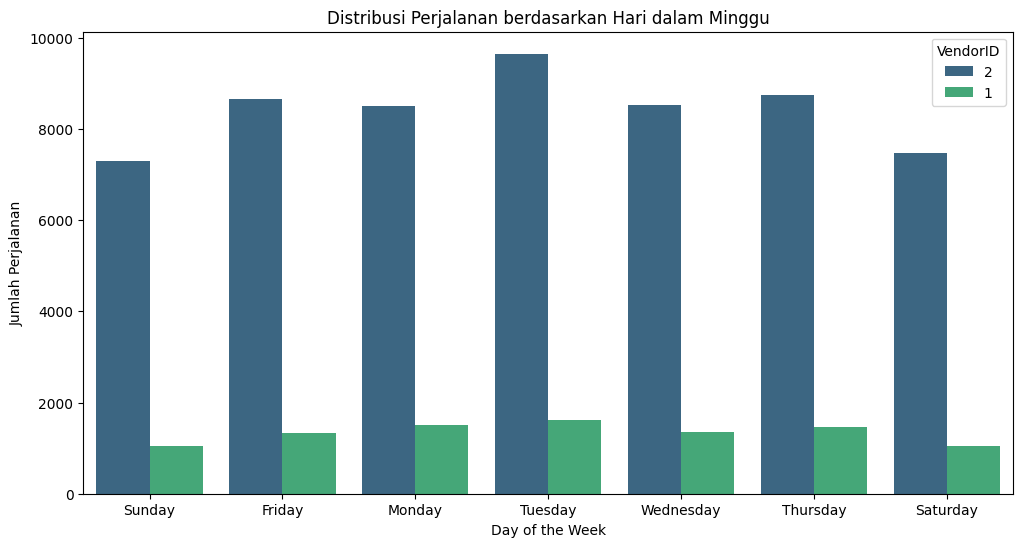

In [70]:
# Distribusi perjalanan berdasarkan hari dalam minggu
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='pickup_day_of_week', hue='VendorID', palette='viridis')
plt.title('Distribusi Perjalanan berdasarkan Hari dalam Minggu')
plt.xlabel('Day of the Week')
plt.ylabel('Jumlah Perjalanan')
plt.legend(title='VendorID')
plt.show()

Interpretasi hasil:
1. Distribusi Perjalanan yang Konsisten:
- Vendor 2 menunjukkan distribusi perjalanan yang cukup konsisten sepanjang minggu, dengan sedikit peningkatan pada hari Selasa.
- Vendor 1 juga menunjukkan distribusi yang relatif konsisten, tetapi dengan jumlah perjalanan yang jauh lebih rendah dibandingkan Vendor 2.
2. Puncak Perjalanan pada Hari Selasa untuk Vendor 2:
- Vendor 2 mencapai puncak jumlah perjalanan pada hari Selasa, dengan hampir 10.000 perjalanan.
- Hari Jumat dan Senin juga menunjukkan jumlah perjalanan yang tinggi untuk Vendor 2.
3. Konsistensi Vendor 1:
- Vendor 1 menunjukkan jumlah perjalanan yang lebih rendah sepanjang minggu, dengan sedikit variasi antar hari.
- Jumlah perjalanan untuk Vendor 1 berkisar antara 2.000 hingga 3.000 perjalanan per hari.

Rekomendasi
1. Optimisasi Armada pada Hari-hari Tertentu: Pastikan ketersediaan armada yang cukup pada hari-hari dengan permintaan tinggi, seperti Selasa, untuk Vendor 2.Vendor 1 juga dapat memanfaatkan data ini untuk menargetkan peningkatan perjalanan pada hari-hari dengan permintaan tinggi.
2. Promosi pada Hari dengan Permintaan Rendah: Vendor 1 dapat mempertimbangkan untuk melakukan promosi atau menawarkan diskon pada hari-hari dengan permintaan rendah untuk meningkatkan penggunaan layanan taksi.
3. Analisis Tambahan: Lakukan analisis tambahan untuk memahami faktor-faktor yang mempengaruhi peningkatan perjalanan pada hari-hari tertentu dan gunakan informasi ini untuk merancang strategi yang lebih efektif.

#### 3. Analisis Lokasi

In [71]:
# Menghitung 10 lokasi penjemputan teratas untuk Vendor 1
top_pu_locations_vendor1 = data[data['VendorID'] == '1']['PULocationID'].value_counts().head(10).reset_index()
top_pu_locations_vendor1.columns = ['PULocationID', 'Count']
top_pu_locations_vendor1

,PULocationID,Count
0,74,2434
1,75,1187
2,65,431
3,166,425
4,41,413
5,244,353
6,97,291
7,42,235
8,82,229
9,210,218


In [72]:
# Menghitung 10 lokasi penjemputan teratas untuk Vendor 2
top_pu_locations_vendor2 = data[data['VendorID'] == '2']['PULocationID'].value_counts().head(10).reset_index()
top_pu_locations_vendor2.columns = ['PULocationID', 'Count']
top_pu_locations_vendor2

,PULocationID,Count
0,74,10823
1,75,7922
2,95,3750
3,41,3645
4,166,3454
5,82,2698
6,43,2654
7,97,1904
8,7,1848
9,42,1565


In [73]:
# Menghitung 10 lokasi pengantaran teratas untuk Vendor 1
top_do_locations_vendor1 = data[data['VendorID'] == '1']['DOLocationID'].value_counts().head(10).reset_index()
top_do_locations_vendor1.columns = ['DOLocationID', 'Count']
top_do_locations_vendor1

,DOLocationID,Count
0,75,609
1,74,437
2,236,411
3,41,354
4,166,351
5,238,326
6,42,326
7,263,222
8,239,219
9,210,206


In [74]:
# Menghitung 10 lokasi pengantaran teratas untuk Vendor 2
top_do_locations_vendor2 = data[data['VendorID'] == "2"]['DOLocationID'].value_counts().head(10).reset_index()
top_do_locations_vendor2.columns = ['DOLocationID', 'Count']
top_do_locations_vendor2

,DOLocationID,Count
0,74,2957
1,75,2915
2,236,2353
3,41,2270
4,42,2015
5,238,2009
6,166,1917
7,95,1529
8,263,1351
9,239,1264


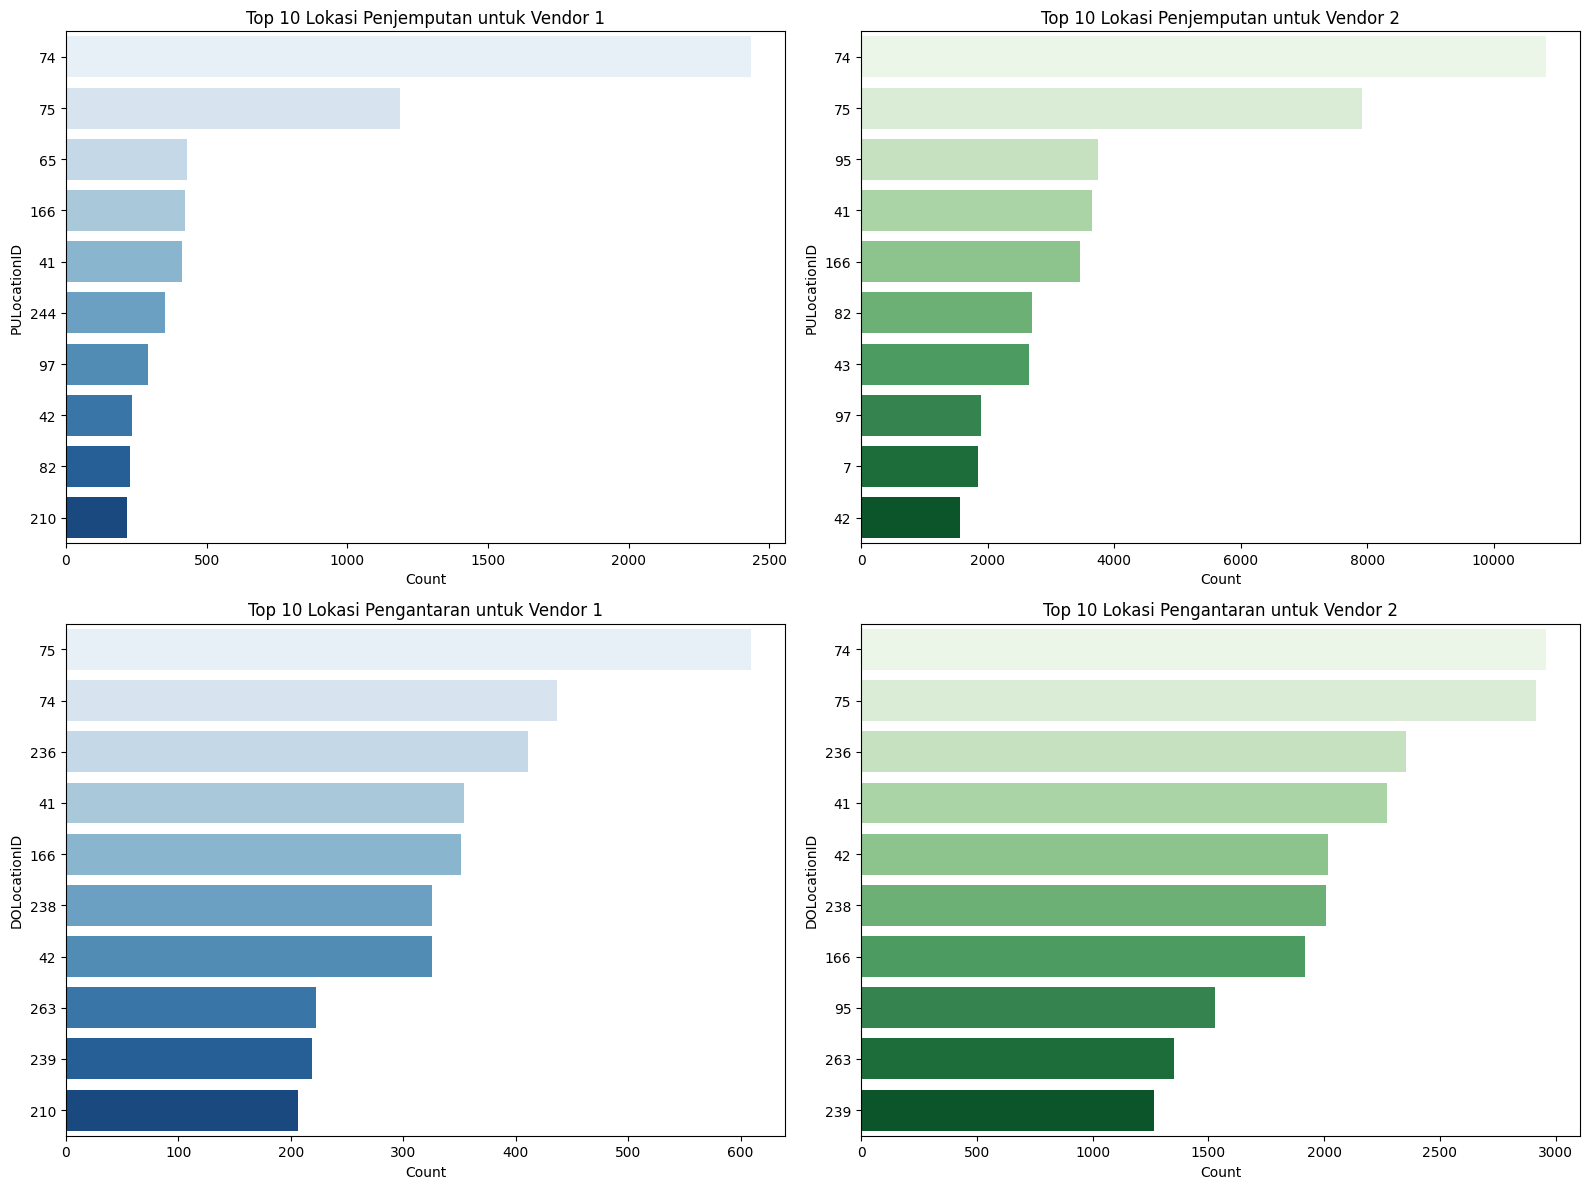

In [75]:
# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot untuk top 10 lokasi penjemputan Vendor 1
sns.barplot(data=top_pu_locations_vendor1, x='Count', y='PULocationID', ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Top 10 Lokasi Penjemputan untuk Vendor 1')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('PULocationID')

# Plot untuk top 10 lokasi penjemputan Vendor 2
sns.barplot(data=top_pu_locations_vendor2, x='Count', y='PULocationID', ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Top 10 Lokasi Penjemputan untuk Vendor 2')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('PULocationID')

# Plot untuk top 10 lokasi pengantaran Vendor 1
sns.barplot(data=top_do_locations_vendor1, x='Count', y='DOLocationID', ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Top 10 Lokasi Pengantaran untuk Vendor 1')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('DOLocationID')

# Plot untuk top 10 lokasi pengantaran Vendor 2
sns.barplot(data=top_do_locations_vendor2, x='Count', y='DOLocationID', ax=axes[1, 1], palette='Greens')
axes[1, 1].set_title('Top 10 Lokasi Pengantaran untuk Vendor 2')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('DOLocationID')

plt.tight_layout()
plt.show()

Interpretasi hasil:
Vendor 1
1. Lokasi Penjemputan Teratas: 
- PULocationID 74 dan 75 adalah lokasi penjemputan teratas untuk Vendor 1, dengan PULocationID 74 memiliki sekitar 2.000 perjalanan dan PULocationID 75 memiliki sekitar 1.500 perjalanan.
- Lokasi-lokasi lain yang sering digunakan termasuk PULocationID 65, 41, dan 166.
2. Lokasi Pengantaran Teratas:
- Lokasi-lokasi lain yang sering digunakan termasuk DOLocationID 236, 41, dan 238.

Vendor 2
1. Lokasi Penjemputan Teratas:
- PULocationID 74 dan 75 juga merupakan lokasi penjemputan teratas untuk Vendor 2, dengan PULocationID 74 memiliki sekitar 10.000 perjalanan dan PULocationID 75 memiliki sekitar 7.000 perjalanan.
-  Lokasi-lokasi lain yang sering digunakan termasuk PULocationID 95, 41, dan 166.
2. Lokasi Pengantaran Teratas:
- DOLocationID 74 dan 75 adalah lokasi pengantaran teratas untuk Vendor 2, dengan masing-masing sekitar 3.000 perjalanan.
- Lokasi-lokasi lain yang sering digunakan termasuk DOLocationID 236, 41, dan 42.

Rekomendasi
1. Peningkatan Layanan di Lokasi Strategis:
- Vendor 1 dapat meningkatkan layanan mereka di lokasi-lokasi penjemputan dan pengantaran teratas untuk bersaing lebih baik dengan Vendor 2.
- Ini bisa melibatkan peningkatan ketersediaan armada, peningkatan kualitas layanan, atau promosi khusus di lokasi-lokasi ini.
2. Analisis Faktor Penarik di Lokasi Teratas:
- Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang membuat lokasi-lokasi ini sangat populer, seperti dekat dengan pusat bisnis, stasiun kereta, atau area perumahan padat.
- Menggunakan informasi ini untuk menargetkan lokasi-lokasi serupa yang belum dimanfaatkan sepenuhnya.
3. Optimalisasi Rute dan Armada: Dengan mengetahui lokasi-lokasi teratas, perusahaan dapat mengoptimalkan rute dan distribusi armada mereka untuk meningkatkan efisiensi operasional dan kepuasan pelanggan.


#### 4. Analisis Jarak Perjalanan

  VendorID  AvgTripDistance
0        1         2.231748
1        2         9.047774


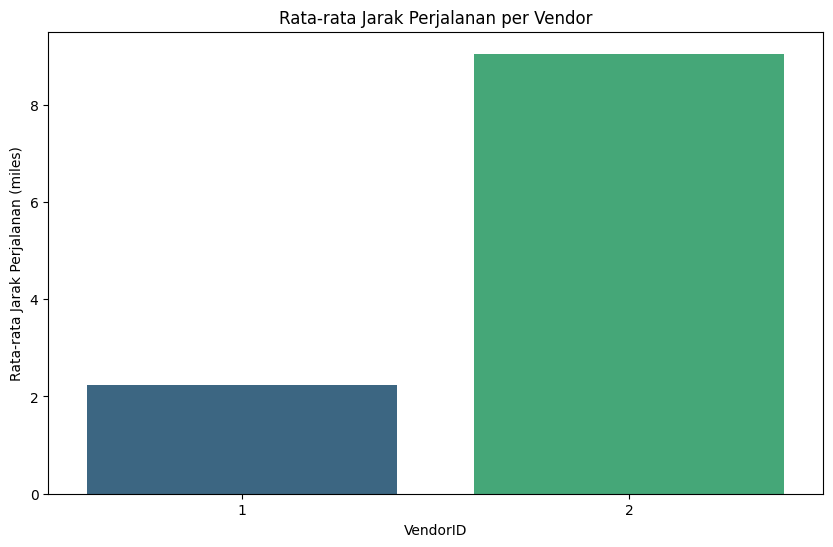

In [76]:
# Menghitung rata-rata jarak perjalanan untuk masing-masing vendor
average_trip_distance = data.groupby('VendorID')['trip_distance'].mean().reset_index()
average_trip_distance.columns = ['VendorID', 'AvgTripDistance']

# Menampilkan data rata-rata jarak perjalanan
print(average_trip_distance)

# Membuat bar chart untuk membandingkan rata-rata jarak perjalanan antara kedua vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=average_trip_distance, x='VendorID', y='AvgTripDistance', palette='viridis')
plt.title('Rata-rata Jarak Perjalanan per Vendor')
plt.xlabel('VendorID')
plt.ylabel('Rata-rata Jarak Perjalanan (miles)')
plt.show()

Interpretasi hasil:
1. Perbedaan Jarak Perjalanan yang Signifikan:
- Vendor 2 memiliki rata-rata jarak perjalanan yang jauh lebih tinggi, sekitar 9 mil per perjalanan.
- Vendor 1 memiliki rata-rata jarak perjalanan yang lebih rendah, sekitar 2,5 mil per perjalanan.
2. Ketimpangan Rata-rata Jarak Perjalanan:
- Perbedaan yang signifikan dalam rata-rata jarak perjalanan antara kedua vendor menunjukkan bahwa Vendor 2 cenderung melayani perjalanan yang lebih panjang dibandingkan Vendor 1.

Rekomendasi
1. Peningkatan Layanan untuk Vendor 1:
- Vendor 1 dapat mempertimbangkan untuk memperluas cakupan area mereka dan menawarkan lebih banyak rute jarak jauh untuk meningkatkan rata-rata jarak perjalanan.
- Menyediakan layanan premium atau rute khusus juga dapat membantu meningkatkan jarak perjalanan.
2. Analisis Permintaan Perjalanan: Lakukan analisis tambahan untuk memahami preferensi dan kebutuhan pelanggan terkait jarak perjalanan. Vendor 1 dapat menggunakan informasi ini untuk menyesuaikan layanan mereka dan menarik lebih banyak pelanggan untuk perjalanan jarak jauh.
3. Optimalisasi Rute dan Armada: Mengoptimalkan rute dan distribusi armada untuk melayani perjalanan jarak jauh dapat membantu Vendor 1 meningkatkan efisiensi operasional dan pendapatan.

#### 5. Analisis Durasi Perjalanan

  VendorID  AvgTripDuration
0        1        15.408297
1        2        18.495294


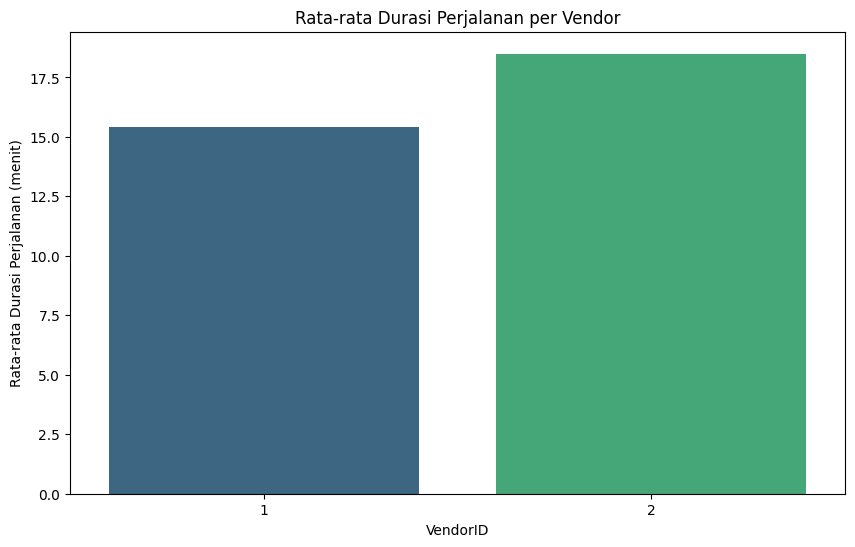

In [77]:
# Menghitung rata-rata durasi perjalanan untuk masing-masing vendor
average_trip_duration = data.groupby('VendorID')['trip_duration'].mean().reset_index()
average_trip_duration.columns = ['VendorID', 'AvgTripDuration']

# Menampilkan data rata-rata durasi perjalanan
print(average_trip_duration)

# Membuat bar chart untuk membandingkan rata-rata durasi perjalanan antara kedua vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=average_trip_duration, x='VendorID', y='AvgTripDuration', palette='viridis')
plt.title('Rata-rata Durasi Perjalanan per Vendor')
plt.xlabel('VendorID')
plt.ylabel('Rata-rata Durasi Perjalanan (menit)')
plt.show()

Interpretasi hasil:
1. Perbedaan Durasi Perjalanan:
- Vendor 2 memiliki rata-rata durasi perjalanan yang sedikit lebih tinggi, sekitar 18 menit per perjalanan.
- Vendor 1 memiliki rata-rata durasi perjalanan sekitar 15 menit per perjalanan.
2. Ketimpangan Durasi Perjalanan: Perbedaan dalam rata-rata durasi perjalanan antara kedua vendor menunjukkan bahwa perjalanan yang dilayani oleh Vendor 2 cenderung sedikit lebih lama dibandingkan dengan Vendor 1.

Rekomendasi
1. Peningkatan Layanan untuk Vendor 1:
- Vendor 1 dapat mempertimbangkan untuk melayani lebih banyak rute jarak jauh atau rute yang cenderung memiliki durasi perjalanan yang lebih lama.
- Mengoptimalkan rute untuk menghindari kemacetan dan mempercepat perjalanan dapat meningkatkan efisiensi operasional dan kepuasan pelanggan.
2. Analisis Rute dan Waktu Perjalanan: Lakukan analisis tambahan untuk memahami perbedaan dalam rute dan waktu perjalanan antara kedua vendor. Informasi ini dapat digunakan untuk merancang strategi yang lebih efektif dalam melayani pelanggan.
3. Optimalisasi Armada dan Rute: Mengoptimalkan distribusi armada dan pemilihan rute dapat membantu meningkatkan efisiensi dan pendapatan. Fokus pada rute yang sering dilalui dan memiliki potensi pendapatan yang tinggi.

#### 6. Analisis Jumlah Tip

  VendorID  AvgTipAmount
0        1      1.667126
1        2      2.214189


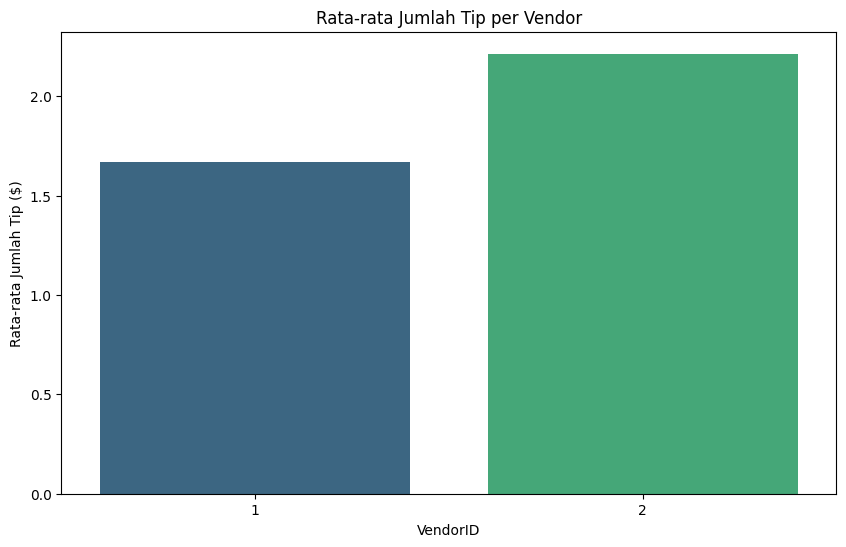

In [78]:
# Menghitung rata-rata jumlah tip untuk masing-masing vendor
average_tip_amount = data.groupby('VendorID')['tip_amount'].mean().reset_index()
average_tip_amount.columns = ['VendorID', 'AvgTipAmount']

# Menampilkan data rata-rata jumlah tip
print(average_tip_amount)

# Membuat bar chart untuk membandingkan rata-rata jumlah tip antara kedua vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=average_tip_amount, x='VendorID', y='AvgTipAmount', palette='viridis')
plt.title('Rata-rata Jumlah Tip per Vendor')
plt.xlabel('VendorID')
plt.ylabel('Rata-rata Jumlah Tip ($)')
plt.show()

Interpretasi hasil:
1.	Perbedaan Jumlah Tip yang Signifikan:
- Vendor 2 memiliki rata-rata jumlah tip yang lebih tinggi, sekitar $2.1 per perjalanan.
- Vendor 1 memiliki rata-rata jumlah tip sekitar $1.7 per perjalanan.
2. Ketimpangan Jumlah Tip: Perbedaan yang signifikan dalam rata-rata jumlah tip antara kedua vendor menunjukkan bahwa pelanggan cenderung memberikan tip lebih besar kepada pengemudi Vendor 2 dibandingkan dengan Vendor 1.

Rekomendasi
1. Peningkatan Layanan untuk Vendor 1:
- Vendor 1 dapat mempertimbangkan untuk meningkatkan kualitas layanan mereka, termasuk pelatihan pengemudi untuk meningkatkan keramahan dan profesionalisme, serta peningkatan kenyamanan kendaraan.
- Menyediakan fasilitas tambahan seperti air mineral atau charger ponsel di dalam kendaraan bisa meningkatkan pengalaman pelanggan dan jumlah tip yang diberikan.
2. Program Insentif: Implementasikan program insentif bagi pengemudi yang menerima jumlah tip yang tinggi, untuk mendorong mereka memberikan layanan terbaik dan meningkatkan kepuasan pelanggan.
3. Analisis Kualitas Layanan: Lakukan analisis untuk memahami faktor-faktor spesifik yang mempengaruhi jumlah tip, seperti waktu perjalanan, rute, atau interaksi pengemudi dengan pelanggan. Menggunakan informasi ini untuk merancang strategi peningkatan layanan yang lebih efektif.

# D. Kesimpulan dan Rekomendasi

Kesimpulan:
Setelah menganalisis berbagai aspek dari data perjalanan taksi berdasarkan dua vendor berbeda (Vendor 1 dan Vendor 2), berikut adalah kesimpulan menyeluruh yang mencakup beberapa temuan utama dan rekomendasi:
1. Dominasi Vendor 2:
- Vendor 2 mendominasi dalam jumlah perjalanan, total biaya perjalanan, jarak perjalanan, durasi perjalanan, dan jumlah tip yang diterima dibandingkan Vendor 1.
- Vendor 2 memiliki hampir tujuh kali lebih banyak perjalanan dan pendapatan total yang jauh lebih tinggi dibandingkan Vendor 1.
2. Distribusi Penjemputan dan Pengantaran:
- Lokasi penjemputan dan pengantaran terpadat untuk kedua vendor adalah PULocationID dan DOLocationID 74 dan 75.
- Vendor 2 memiliki jumlah perjalanan yang jauh lebih tinggi di lokasi-lokasi strategis ini, menunjukkan cakupan yang lebih luas dan mungkin layanan yang lebih baik.
3. Rata-rata Jarak dan Durasi Perjalanan:
- Vendor 2 memiliki rata-rata jarak perjalanan yang lebih panjang (sekitar 9 mil) dibandingkan Vendor 1 (sekitar 2,5 mil).
- Durasi perjalanan untuk Vendor 2 juga sedikit lebih lama (sekitar 18 menit) dibandingkan Vendor 1 (sekitar 15 menit).
4. Jumlah Tip:
- Vendor 2 menerima rata-rata jumlah tip yang lebih tinggi ($2.1) dibandingkan Vendor 1 ($1.7), menunjukkan bahwa pelanggan lebih puas dengan layanan yang diberikan oleh Vendor 2.

Rekomendasi untuk Vendor 1
1. Peningkatan Layanan:
- Vendor 1 perlu meningkatkan kualitas layanan mereka untuk bersaing dengan Vendor 2. Ini bisa melibatkan pelatihan pengemudi, peningkatan kenyamanan kendaraan, dan menyediakan fasilitas tambahan untuk meningkatkan pengalaman pelanggan.
2. Ekspansi Cakupan dan Rute:
- Vendor 1 dapat mempertimbangkan untuk memperluas cakupan area mereka dan menawarkan lebih banyak rute jarak jauh untuk meningkatkan rata-rata jarak dan durasi perjalanan.
- Mengoptimalkan rute dan distribusi armada dapat meningkatkan efisiensi operasional dan pendapatan.
3. Promosi dan Insentif:
- Vendor 1 dapat melakukan promosi khusus atau menawarkan diskon pada jam-jam non-puncak untuk meningkatkan jumlah perjalanan.
- Implementasikan program insentif bagi pengemudi yang menerima jumlah tip yang tinggi untuk mendorong mereka memberikan layanan terbaik.
4. Analisis Permintaan dan Preferensi Pelanggan:
- Lakukan analisis tambahan untuk memahami preferensi dan kebutuhan pelanggan terkait jarak perjalanan, waktu perjalanan, dan kualitas layanan.
- Menggunakan informasi ini untuk menyesuaikan layanan mereka dan menarik lebih banyak pelanggan.

In [79]:
data.to_excel('analysed_dataset.xlsx', index=False)